# Project_2_LIGHTGBM

J_C

# Load dataset

In [290]:
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels


In [291]:
import numpy as np  
from sklearn.model_selection import train_test_split 


In [292]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [293]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))     

In [294]:
data = pd.read_csv('SBA_loans_project_2(1).zip')

In [295]:
print("Data shape:", data.shape)        

Data shape: (807450, 21)


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807450 entries, 0 to 807449
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              807450 non-null  int64  
 1   City               807424 non-null  object 
 2   State              807437 non-null  object 
 3   Zip                807450 non-null  int64  
 4   Bank               806103 non-null  object 
 5   BankState          806097 non-null  object 
 6   NAICS              807450 non-null  int64  
 7   NoEmp              807450 non-null  int64  
 8   NewExist           807328 non-null  float64
 9   CreateJob          807450 non-null  int64  
 10  RetainedJob        807450 non-null  int64  
 11  FranchiseCode      807450 non-null  int64  
 12  UrbanRural         807450 non-null  int64  
 13  RevLineCr          803360 non-null  object 
 14  LowDoc             805159 non-null  object 
 15  DisbursementGross  807450 non-null  object 
 16  Ba

Lets ck individual variables:RevLineCr,LowDoc,NewExist 

In [297]:
desc_df = describe_more(data)
desc_df 


,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,807450,int64,1,6,"{0: 1, 538292: 1, 538294: 1, 538295: 1, 538296..."
1,City,31282,object,1,30,"{'LOS ANGELES': 10411, 'HOUSTON': 9199, 'NEW Y..."
2,State,51,object,2,3,"{'CA': 117588, 'TX': 63276, 'NY': 51662, 'FL':..."
3,Zip,32684,int64,1,5,"{90015: 859, 10001: 828, 93401: 686, 90010: 65..."
4,Bank,5723,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78084, 'WELLS F..."
5,BankState,56,object,2,3,"{'CA': 106262, 'NC': 71538, 'IL': 59243, 'OH':..."
6,NAICS,1308,int64,1,6,"{0: 181513, 722110: 25135, 722211: 17482, 8111..."
7,NoEmp,572,int64,1,4,"{1: 137896, 2: 124295, 3: 81375, 4: 66150, 5: ..."
8,NewExist,3,float64,3,3,"{1.0: 579047, 2.0: 227352, 0.0: 929}"
9,CreateJob,240,int64,1,4,"{0: 564999, 1: 56654, 2: 51866, 3: 25911, 4: 1..."


SBA Dataset Columns Explanation

Name :
Borrower name City 
Borrower city State : 
Borrower state Zip :
Borrower zip code
Bank :
Bank name
BankState : 
Bank state NAICS : North American industry classification system code;refer to the industry each business belongs to, where each additional number is like a more granular filter that pinpoints the specific type of business. 
NoEmp : Number of business employees 
NewExist : 1 = Existing business, 2 = New business
CreateJob : Number of jobs created 
RetainedJob : Number of jobs retained
FranchiseCode : Franchise code, (00000 or 00001) = No franchise 
UrbanRural : 1 = Urban, 2 = rural, 0 = undefined 
RevLineCr : Revolving line of credit: Y = Yes, N = No
LowDoc : LowDoc Loan Program: Y = Yes, N = No 
DisbursementGross : Amount disbursed 
BalanceGross : Gross amount outstanding 
MIS_Status : Loan status charged off = CHGOFF, Paid in full =PIF 
GrAppv : Gross amount of loan approved by bank 
SBA_Appv : SBA’s guaranteed amount of approved loan

MIS_Status: is the target feature of this problem. There are two classes of loan status, namely, higher risk and lowerisk. Loan with higher risk will be likely to default on loan, whereas loan with lower risk will be likely to pay off loan in full. Loan with higher risk will be denoted as CHGOFF or charged off/failure to pay in full. Loan with Lower risk will be denoted as PIF or pay off the loan in full.

Low Doc Columns: After checking LowDoc there are some value that not defined as 'N' or 'Y'. That codes are C,S,A,R,and0 which are not defined and dont know what that code means. Because of the number of that values are not too much (could see on the cell below). So, I decided to label as another variable as "O" ; If data willl have enough records after cleaning, will drop this "o" column.

In [298]:
#Deleting duplicates if any
data= data.drop_duplicates(keep = 'first')

data.shape

#no duplicates

(807450, 21)

In [299]:
data.isna().sum()

index                   0
City                   26
State                  13
Zip                     0
Bank                 1347
BankState            1353
NAICS                   0
NoEmp                   0
NewExist              122
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4090
LowDoc               2291
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
LoanInd                 0
MIS_Status              0
dtype: int64

In [300]:
data.LowDoc.unique()

array(['N', 'Y', 'S', nan, 'C', '0', 'R', 'A', '1'], dtype=object)

In [301]:
# Create third column for values
data.loc[(data['LowDoc'] == "C"), 'LowDoc'] = "O"

data.loc[(data['LowDoc'] == "S"), 'LowDoc'] = "O"
data.loc[(data['LowDoc'] == "0"), 'LowDoc'] = "O"

data.loc[(data['LowDoc'] == "A"), 'LowDoc'] = "O"
data.loc[(data['LowDoc'] == "R"), 'LowDoc'] = "O"
data.loc[(data['LowDoc'] == "1"), 'LowDoc'] = "O"

data['LowDoc'].value_counts()

N    702838
Y     99254
O      3067
Name: LowDoc, dtype: int64

In [302]:
data["LowDoc"].fillna( method ='ffill', inplace = True)

In [303]:
data['LowDoc'].value_counts()

N    704835
Y     99535
O      3080
Name: LowDoc, dtype: int64

In [304]:
data= data[data['LowDoc']!="O"]

In [305]:
data['LowDoc'].value_counts()

N    704835
Y     99535
Name: LowDoc, dtype: int64

In [306]:
data['LowDoc'] = [1 if status == 'Y' else 0 for status in data.LowDoc.values] 

In [307]:
data['LowDoc'].value_counts()

0    704835
1     99535
Name: LowDoc, dtype: int64

In [308]:
data['RevLineCr'].value_counts()

N    375438
0    231110
Y    180193
T     13711
1        19
R        13
`        10
2         5
,         1
7         1
4         1
A         1
.         1
Q         1
-         1
C         1
5         1
3         1
Name: RevLineCr, dtype: int64

RevLineCr: As per data description,revolving line of credit= Y Or N, this variable other undefined column so will make another columnn those recoreds as "o".

In [309]:
data.loc[(data['RevLineCr'] == "0"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "R"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "1"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "2"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "T"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "`"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "C"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "."), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "-"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "7"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "A"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "Q"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "5"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "3"), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == ","), 'RevLineCr'] = "O"
data.loc[(data['RevLineCr'] == "4"), 'RevLineCr'] = "O"

In [310]:
data= data[data['RevLineCr']!="O"]

I will use same approch for this variable as well, will drop this new column records.

In [311]:
data['RevLineCr'].value_counts()

N    375438
Y    180193
Name: RevLineCr, dtype: int64

In [312]:
data["RevLineCr"].fillna( method ='ffill', inplace = True)

In [313]:
data['RevLineCr'].value_counts()

N    377969
Y    181523
Name: RevLineCr, dtype: int64

In [314]:
data['RevLineCr'].value_counts()

N    377969
Y    181523
Name: RevLineCr, dtype: int64

Lets assign labels to column so no need of encoding

In [315]:
data['RevLineCr'] = [1 if status == 'Y' else 0 for status in data.RevLineCr.values] 


In [316]:
data['RevLineCr'].value_counts()

0    377969
1    181523
Name: RevLineCr, dtype: int64

In [317]:
data['NewExist'].unique()

array([ 2.,  1.,  0., nan])

In [318]:
data["NewExist"].fillna( method ='ffill', inplace = True)

In [319]:
# Keep records where NewExist == 1 or 2
data = data[(data['NewExist'] == 1) | (data['NewExist'] == 2)]


In [320]:
data['NewExist'].unique()

array([2., 1.])

In [321]:
#Filling the Null values with "Missing" and "0"
values_to_fill = {}
for col in data:
    if data[col].dtype == 'object':
        values_to_fill[col] = "Missing"
    else:
        values_to_fill[col] = 0

data.fillna(value=values_to_fill,inplace=True)
data.fillna(value=values_to_fill, inplace=True)

In [322]:
data.isna().sum()

index                0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
LoanInd              0
MIS_Status           0
dtype: int64

In [323]:
data.FranchiseCode.unique()

array([    1,     0, 30215, ..., 26600,  6300, 99999], dtype=int64)

From table information we know that Franchise code, (00000 or 00001) = Nofranchise. So I decided to separate the Franchise to be :

FranchiseCode = 1 (have franchise) FranchiseCode = 0 (no franchise)

In [324]:
def new_franchise(x):
    if (x == 1) | (x == 0):
        return 0
    else :
        return 1

data['FranchiseCode'] = data['FranchiseCode'].apply(lambda x: new_franchise(x))

In [325]:
data.FranchiseCode.unique()

array([0, 1], dtype=int64)

In [326]:
data[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,"$114,577.00",$0.00,"$114,577.00","$85,933.00"
1,"$25,000.00",$0.00,"$25,000.00","$12,500.00"
3,"$230,000.00",$0.00,"$230,000.00","$195,500.00"
4,"$32,000.00",$0.00,"$32,000.00","$16,000.00"
5,"$150,000.00",$0.00,"$150,000.00","$112,500.00"


In [327]:
def currencyCleaning(x):
    x = x[1:].replace(',','')
    return x

In [328]:
data['DisbursementGross'] = data['DisbursementGross'].apply(currencyCleaning).astype(float).astype(int)
data['SBA_Appv'] = data['SBA_Appv'].apply(currencyCleaning).astype(float).astype(int)
data['BalanceGross'] = data['BalanceGross'].apply(currencyCleaning).astype(float).astype(int)
data['GrAppv'] = data['GrAppv'].apply(currencyCleaning).astype(float).astype(int)

In [329]:
data[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
0,114577,0,114577,85933
1,25000,0,25000,12500
3,230000,0,230000,195500
4,32000,0,32000,16000
5,150000,0,150000,112500


In [330]:
desc_df1 = describe_more(data)
desc_df1


,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,558625,int64,1,6,"{0: 1, 538270: 1, 538261: 1, 538262: 1, 538264..."
1,City,27567,object,1,30,"{'LOS ANGELES': 6284, 'HOUSTON': 5251, 'NEW YO..."
2,State,52,object,2,7,"{'CA': 73743, 'NY': 39524, 'TX': 38721, 'FL': ..."
3,Zip,29453,int64,1,5,"{10001: 633, 90015: 614, 90010: 510, 33166: 44..."
4,Bank,5393,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 62363, 'WELLS F..."
5,BankState,56,object,2,7,"{'NC': 57356, 'CA': 54986, 'IL': 46865, 'OH': ..."
6,NAICS,1302,int64,1,6,"{0: 140895, 722110: 12948, 811111: 8741, 72221..."
7,NoEmp,513,int64,1,4,"{1: 93280, 2: 83538, 3: 55096, 4: 45131, 5: 37..."
8,NewExist,2,float64,3,3,"{1.0: 406904, 2.0: 151721}"
9,CreateJob,215,int64,1,4,"{0: 411237, 1: 36596, 2: 31344, 3: 14831, 4: 1..."


In [331]:
desc_df1.iloc[[7,11,12,13,18]]["Level_Values"]

7     {1: 93280, 2: 83538, 3: 55096, 4: 45131, 5: 37...
11                                {0: 534955, 1: 23670}
12                     {1: 266960, 0: 232461, 2: 59204}
13                               {0: 377134, 1: 181491}
18    {25000: 36441, 12500: 30783, 5000: 24256, 5000...
Name: Level_Values, dtype: object

In [332]:
desc_df1.iloc[5]["Level_Values"]            

{'NC': 57356,
 'CA': 54986,
 'IL': 46865,
 'OH': 40241,
 'RI': 32699,
 'SD': 31159,
 'NY': 26352,
 'TX': 24820,
 'VA': 19011,
 'DE': 14861,
 'UT': 12776,
 'MN': 10904,
 'WI': 10142,
 'PA': 9851,
 'MO': 9749,
 'MA': 8905,
 'GA': 8766,
 'AL': 8722,
 'FL': 8584,
 'IA': 6709,
 'OR': 6561,
 'WA': 6404,
 'KS': 6029,
 'CO': 5629,
 'MT': 5460,
 'CT': 5446,
 'OK': 4692,
 'MI': 4621,
 'IN': 4586,
 'NH': 4495,
 'AR': 4479,
 'MD': 4401,
 'MS': 4121,
 'NJ': 3864,
 'TN': 3700,
 'ND': 3599,
 'VT': 3440,
 'LA': 3233,
 'SC': 3200,
 'NE': 3120,
 'NM': 2949,
 'KY': 2769,
 'ID': 2758,
 'NV': 2411,
 'ME': 2359,
 'AZ': 1877,
 'DC': 1856,
 'HI': 1678,
 'WY': 1502,
 'WV': 1377,
 'Missing': 1335,
 'AK': 1117,
 'PR': 95,
 'GU': 2,
 'EN': 1,
 'AN': 1}

Upon observing NAICS level values we see that NAICS is a six digit numeric code.

So, we remove all the data with incomplete NAICS code is zero

In [333]:
data[data['NAICS']==0]

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
3,3,GRAND PRAIRIE,TX,75050,PROSPERITY BANK,TX,0,18,1.0,0,0,0,0,0,0,230000,0,230000,195500,5,0
10,10,LITTLE ROCK,AR,72205,REGIONS BANK,AR,0,3,1.0,0,0,0,0,0,1,100000,0,100000,90000,6,0
26,26,BILLINGS,MT,59101,UNITED BANK,MT,0,20,1.0,0,0,0,0,0,0,360000,0,360000,270000,5,0
38,38,MAPLE GROVE,MN,55369,WELLS FARGO BANK NATL ASSOC,SD,0,3,1.0,0,0,0,0,0,0,139500,0,139500,125550,2,0
46,46,BISHOP,CA,93514,FDIC/MONCOR BANK,CA,0,5,1.0,0,0,0,0,0,0,125000,0,125000,110375,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807430,807430,EL CENTRO,CA,92243,COMM. INDUST DEELOPMENT,CA,0,10,1.0,2,8,0,0,0,0,125000,0,125000,125000,7,0
807441,807441,WEST DES MOINES,IA,50265,IOWA STATE BANK,IA,0,9,1.0,0,0,0,0,0,1,80000,0,80000,64000,5,0
807442,807442,SAN CARLO,CA,94065,WELLS FARGO BANK NATL ASSOC,SD,0,16,1.0,0,0,1,0,0,0,245000,0,245000,196000,5,0
807445,807445,GRAND FORKS,ND,58208,FRANDSEN BANK & TRUST,ND,0,41,1.0,0,0,0,0,0,0,90000,0,90000,81000,7,0


In [334]:
data.NAICS
NAICSTrue = 0
NAICSFalse = 0
for i in data.NAICS.astype(str):
    if len(i) == 6:
        NAICSTrue += 1
    else:
        NAICSFalse += 1
print(NAICSTrue)
print(NAICSFalse)

417730
140895


In [335]:
data = data[data.NAICS != 0]           

In [336]:
desc_df1 = describe_more(data)
desc_df1


,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,417730,int64,1,6,"{0: 1, 538434: 1, 538452: 1, 538450: 1, 538447..."
1,City,24445,object,1,30,"{'LOS ANGELES': 5277, 'NEW YORK': 4325, 'HOUST..."
2,State,52,object,2,7,"{'CA': 56011, 'NY': 31165, 'TX': 27784, 'FL': ..."
3,Zip,26259,int64,1,5,"{10001: 557, 90015: 552, 90010: 482, 33166: 38..."
4,Bank,4771,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 54554, 'JPMORGA..."
5,BankState,55,object,2,7,"{'NC': 51338, 'CA': 41269, 'IL': 38880, 'OH': ..."
6,NAICS,1301,int64,6,6,"{722110: 12948, 811111: 8741, 722211: 8398, 62..."
7,NoEmp,419,int64,1,4,"{1: 78640, 2: 68698, 3: 43718, 4: 34652, 5: 28..."
8,NewExist,2,float64,3,3,"{1.0: 306591, 2.0: 111139}"
9,CreateJob,186,int64,1,4,"{0: 288320, 1: 35926, 2: 30169, 3: 13663, 4: 9..."


In [337]:
data.isna().sum()

index                0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
LoanInd              0
MIS_Status           0
dtype: int64

# Split dataset to Train/Test/Validation
#split data

In [338]:
#split data
from sklearn.model_selection import train_test_split

x= data.drop(['MIS_Status'], axis=1)
y= data["MIS_Status"]

X_train,X_tv,y_train, y_tv = train_test_split(x,y,train_size =0.70, test_size=0.30,random_state = 42)

print(X_train.shape), print(y_train.shape)

print(X_tv.shape), print(y_tv.shape)

(292411, 20)
(292411,)
(125319, 20)
(125319,)


(None, None)

In [339]:
X_test,X_valid,y_test, y_valid = train_test_split(X_tv,y_tv,train_size =0.50, test_size=0.50,random_state = 42)

print(X_test.shape), print(y_test.shape)
print(X_valid.shape), print(y_valid.shape)

(62659, 20)
(62659,)
(62660, 20)
(62660,)


(None, None)

# Encode categorical variables

In [340]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from copy import deepcopy

'''Save original columns that need to be droped or not used
   Vave One-ho and Label encoders for future use
'''
cols_to_drop = []
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print("Target Encode scaling of ", col)
        enc = ce.TargetEncoder()
        enc.fit(X_train[col],y_train)
        new_col_name = col+"_trg"
        X_train[new_col_name] = enc.transform(X_train[[col]])
        X_test[new_col_name] = enc.transform(X_test[[col]])
        X_valid[new_col_name] = enc.transform(X_valid[[col]])
        cat_encoders[col] = [deepcopy(enc),"trg"]
        cat_enc_columns.append(new_col_name)
        
    cols_to_drop.append(col)

Target Encode scaling of  City
Target Encode scaling of  State
Target Encode scaling of  Bank
Target Encode scaling of  BankState


In [256]:
X_train.head(2)

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg
214512,214512,ROCKVILLE,MD,20850,"PNC BANK, NATIONAL ASSOCIATION",DE,445120,1,1.0,2,2,0,1,0,0,309000,0,309000,231750,5,0.176472,0.215131,0.233515,0.287856
792716,792716,NEW YORK,NY,10040,BANCO POPULAR NORTH AMERICA,NY,485310,4,1.0,0,0,0,0,0,0,304750,0,304750,228563,7,0.247039,0.238473,0.544014,0.186312


Drop index column

In [257]:
#data.drop(['index'], axis=1, inplace=True)

# Add engineered features

# Add new feature:New business

In [258]:
# Create NewBusiness field where 0 = Existing business and 1 = New business; based on NewExist field

Whether a business is new or established (represented as “NewExist” in the dataset). Therefore, a dummy variable was created for the 
regression:“New” = 1 if the business is less than or equal to 2 years
old and “New” = 0 if the business is more than 2 years old

In [259]:
X_train['NewBusiness']=X_train['NewExist'].copy()

In [260]:
X_train['NewBusiness'] = [1 if status == 2.0 else 0 for status in X_train.NewBusiness.values]

In [261]:
X_test['NewBusiness']=X_test['NewExist'].copy()

In [262]:
X_valid['NewBusiness']=X_valid['NewExist'].copy()

In [263]:
X_test['NewBusiness'] = [1 if status == 2.0 else 0 for status in X_test.NewBusiness.values]

In [264]:
X_valid['NewBusiness'] = [1 if status == 2.0 else 0 for status in X_valid.NewBusiness.values]

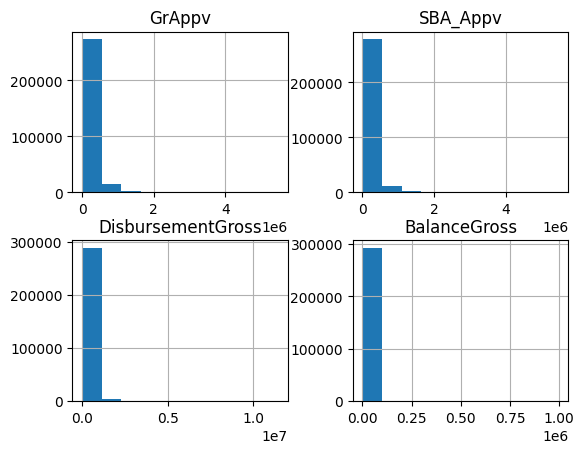

In [265]:
import matplotlib.pyplot as plt
import numpy as np

X_train[['GrAppv','SBA_Appv','DisbursementGross','BalanceGross']].hist()
plt.show()

#log transform variables
#log_var=['GrAppv','SBA_Appv','DisbursementGross']

Variables distribution more skewd, log transformation help with distribution as well as montory values prediction more easier with log-values so will add log tranformation to above 3 variables.

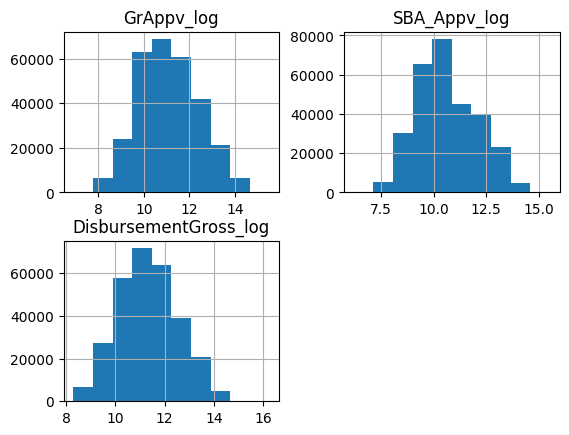

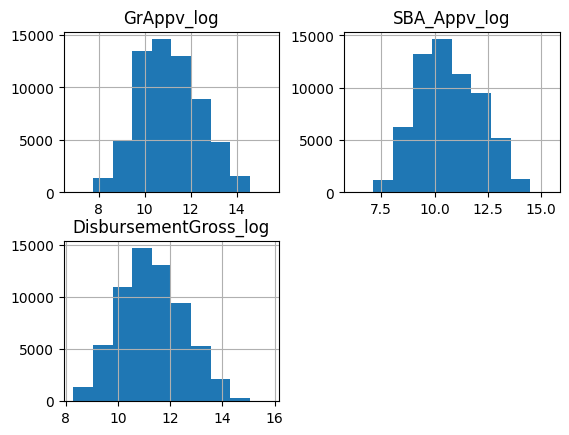

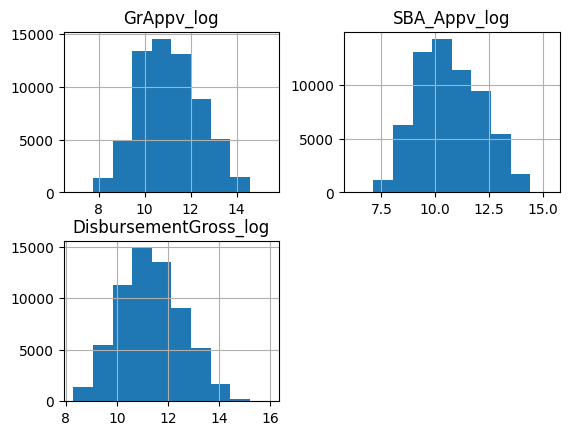

In [266]:
# Apply the log transform to the data
X_train[['GrAppv_log','SBA_Appv_log','DisbursementGross_log']] = np.log(X_train[['GrAppv','SBA_Appv','DisbursementGross']])

# Plot the data before and after the transformation
X_train[['GrAppv_log','SBA_Appv_log','DisbursementGross_log']].hist()
plt.show()
#for test
# Apply the log transform to the data
X_test[['GrAppv_log','SBA_Appv_log','DisbursementGross_log']] = np.log(X_test[['GrAppv','SBA_Appv','DisbursementGross']])

# Plot the data before and after the transformation
X_test[['GrAppv_log','SBA_Appv_log','DisbursementGross_log']].hist()
plt.show()

# Apply the log transform to the data
X_valid[['GrAppv_log','SBA_Appv_log','DisbursementGross_log']] = np.log(X_valid[['GrAppv','SBA_Appv','DisbursementGross']])

# Plot the data before and after the transformation
X_valid[['GrAppv_log','SBA_Appv_log','DisbursementGross_log']].hist()
plt.show()

In [267]:
X_train.head(2)

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewBusiness,GrAppv_log,SBA_Appv_log,DisbursementGross_log
214512,214512,ROCKVILLE,MD,20850,"PNC BANK, NATIONAL ASSOCIATION",DE,445120,1,1.0,2,2,0,1,0,0,309000,0,309000,231750,5,0.176472,0.215131,0.233515,0.287856,0,12.641097,12.353414,12.641097
792716,792716,NEW YORK,NY,10040,BANCO POPULAR NORTH AMERICA,NY,485310,4,1.0,0,0,0,0,0,0,304750,0,304750,228563,7,0.247039,0.238473,0.544014,0.186312,0,12.627247,12.339567,12.627247


Make variable NewExist, UrbanRural,LowDoc,RevLineCr ,FranchiseCode as categorial and add columns;'NewExist_1','NewExist_2',UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1

In [270]:
#for train
X_train['NewExist_1'] = [1 if status == 1 else 0 for status in X_train.NewExist.values] 
X_train['NewExist_2'] = [1 if status == 2 else 0 for status in X_train.NewExist.values] 

X_train['UrbanRural_0'] = [1 if status == 0 else 0 for status in X_train.UrbanRural.values]
X_train['UrbanRural_1'] = [1 if status == 1 else 0 for status in X_train.UrbanRural.values] 
X_train['UrbanRural_2'] = [1 if status == 2 else 0 for status in X_train.UrbanRural.values] 

X_train['LowDoc_0'] = [1 if status == 0 else 0 for status in X_train.LowDoc.values] 
X_train['LowDoc_1'] = [1 if status == 1 else 0 for status in X_train.LowDoc.values] 

X_train['RevLineCr_0'] = [1 if status == 0 else 0 for status in X_train.RevLineCr.values] 
X_train['RevLineCr_1'] = [1 if status == 1 else 0 for status in X_train.RevLineCr.values] 

X_train['FranchiseCode_0'] = [1 if status == 0 else 0 for status in X_train.FranchiseCode.values] 
X_train['FranchiseCode_1'] = [1 if status == 1 else 0 for status in X_train.FranchiseCode.values]



#for test
X_test['NewExist_1'] = [1 if status == 1 else 0 for status in X_test.NewExist.values] 
X_test['NewExist_2'] = [1 if status == 2 else 0 for status in X_test.NewExist.values] 

X_test['UrbanRural_0'] = [1 if status == 0 else 0 for status in X_test.UrbanRural.values]
X_test['UrbanRural_1'] = [1 if status == 1 else 0 for status in X_test.UrbanRural.values] 
X_test['UrbanRural_2'] = [1 if status == 2 else 0 for status in X_test.UrbanRural.values] 

X_test['LowDoc_0'] = [1 if status == 0 else 0 for status in X_test.LowDoc.values] 
X_test['LowDoc_1'] = [1 if status == 1 else 0 for status in X_test.LowDoc.values] 

X_test['RevLineCr_0'] = [1 if status == 0 else 0 for status in X_test.RevLineCr.values] 
X_test['RevLineCr_1'] = [1 if status == 1 else 0 for status in X_test.RevLineCr.values] 

X_test['FranchiseCode_0'] = [1 if status == 0 else 0 for status in X_test.FranchiseCode.values] 
X_test['FranchiseCode_1'] = [1 if status == 1 else 0 for status in X_test.FranchiseCode.values]
#for valid

X_valid['NewExist_1'] = [1 if status == 1 else 0 for status in X_valid.NewExist.values] 
X_valid['NewExist_2'] = [1 if status == 2 else 0 for status in X_valid.NewExist.values] 

X_valid['UrbanRural_0'] = [1 if status == 0 else 0 for status in X_valid.UrbanRural.values]
X_valid['UrbanRural_1'] = [1 if status == 1 else 0 for status in X_valid.UrbanRural.values] 
X_valid['UrbanRural_2'] = [1 if status == 2 else 0 for status in X_valid.UrbanRural.values] 

X_valid['LowDoc_0'] = [1 if status == 0 else 0 for status in X_valid.LowDoc.values] 
X_valid['LowDoc_1'] = [1 if status == 1 else 0 for status in X_valid.LowDoc.values] 

X_valid['RevLineCr_0'] = [1 if status == 0 else 0 for status in X_valid.RevLineCr.values] 
X_valid['RevLineCr_1'] = [1 if status == 1 else 0 for status in X_valid.RevLineCr.values] 

X_valid['FranchiseCode_0'] = [1 if status == 0 else 0 for status in X_valid.FranchiseCode.values] 
X_valid['FranchiseCode_1'] = [1 if status == 1 else 0 for status in X_valid.FranchiseCode.values]


In [271]:
X_train.head(2)

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewBusiness,GrAppv_log,SBA_Appv_log,DisbursementGross_log,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1
214512,214512,ROCKVILLE,MD,20850,"PNC BANK, NATIONAL ASSOCIATION",DE,445120,1,1.0,2,2,0,1,0,0,309000,0,309000,231750,5,0.176472,0.215131,0.233515,0.287856,0,12.641097,12.353414,12.641097,1,0,0,1,0,1,0,1,0,1,0
792716,792716,NEW YORK,NY,10040,BANCO POPULAR NORTH AMERICA,NY,485310,4,1.0,0,0,0,0,0,0,304750,0,304750,228563,7,0.247039,0.238473,0.544014,0.186312,0,12.627247,12.339567,12.627247,1,0,1,0,0,1,0,1,0,1,0


Add few columns with interaction terms

In [272]:
#interaction terms for train
X_train['UrbanRural_1_LowDoc_1']=X_train['UrbanRural_1']*X_train['LowDoc_1'] #interaction term for urban area with low doc program
X_train['UrbanRural_2_LowDoc_1']=X_train['UrbanRural_2']*X_train['LowDoc_1'] #interaction term for rular area with low doc progra

X_train['UrbanRural_1_LowDoc_0']=X_train['UrbanRural_1']*X_train['LowDoc_0'] #with no low doc
X_train['UrbanRural_2_LowDoc_0']=X_train['UrbanRural_2']*X_train['LowDoc_0']#with no low doc program


X_train['FranchiseCode_1_Bank_trg']=X_train['FranchiseCode_1']*X_train['Bank_trg']#with no low doc program
X_train['FranchiseCode_0_Bank_trg']=X_train['FranchiseCode_0']*X_train['Bank_trg']#with no low doc program

X_train['RevLineCr_0_SBA_Appv']=X_train['RevLineCr_0']*X_train['SBA_Appv']
X_train['RevLineCr_1_SBA_Appv']=X_train['RevLineCr_1']*X_train['SBA_Appv']


#interaction terms for test
X_test['UrbanRural_1_LowDoc_1']=X_test['UrbanRural_1']*X_test['LowDoc_1'] #interaction term for urban area with low doc program
X_test['UrbanRural_2_LowDoc_1']=X_test['UrbanRural_2']*X_test['LowDoc_1'] #interaction term for rular area with low doc progra

X_test['UrbanRural_1_LowDoc_0']=X_test['UrbanRural_1']*X_test['LowDoc_0'] #with no low doc
X_test['UrbanRural_2_LowDoc_0']=X_test['UrbanRural_2']*X_test['LowDoc_0']#with no low doc program


X_test['FranchiseCode_1_Bank_trg']=X_test['FranchiseCode_1']*X_test['Bank_trg']#with no low doc program
X_test['FranchiseCode_0_Bank_trg']=X_test['FranchiseCode_0']*X_test['Bank_trg']#with no low doc program

X_test['RevLineCr_0_SBA_Appv']=X_test['RevLineCr_0']*X_test['SBA_Appv']
X_test['RevLineCr_1_SBA_Appv']=X_test['RevLineCr_1']*X_test['SBA_Appv']

#interaction terms for valid
X_valid['UrbanRural_1_LowDoc_1']=X_valid['UrbanRural_1']*X_valid['LowDoc_1'] #interaction term for urban area with low doc program
X_valid['UrbanRural_2_LowDoc_1']=X_valid['UrbanRural_2']*X_valid['LowDoc_1'] #interaction term for rular area with low doc progra

X_valid['UrbanRural_1_LowDoc_0']=X_valid['UrbanRural_1']*X_valid['LowDoc_0'] #with no low doc
X_valid['UrbanRural_2_LowDoc_0']=X_valid['UrbanRural_2']*X_valid['LowDoc_0']#with no low doc program


X_valid['FranchiseCode_1_Bank_trg']=X_valid['FranchiseCode_1']*X_valid['Bank_trg']#with no low doc program
X_valid['FranchiseCode_0_Bank_trg']=X_valid['FranchiseCode_0']*X_valid['Bank_trg']#with no low doc program

X_valid['RevLineCr_0_SBA_Appv']=X_valid['RevLineCr_0']*X_valid['SBA_Appv']
X_valid['RevLineCr_1_SBA_Appv']=X_valid['RevLineCr_1']*X_valid['SBA_Appv']


In [274]:
X_train.columns

Index(['index', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'LoanInd', 'City_trg', 'State_trg', 'Bank_trg',
       'BankState_trg', 'NewBusiness', 'GrAppv_log', 'SBA_Appv_log',
       'DisbursementGross_log', 'NewExist_1', 'NewExist_2', 'UrbanRural_0',
       'UrbanRural_1', 'UrbanRural_2', 'LowDoc_0', 'LowDoc_1', 'RevLineCr_0',
       'RevLineCr_1', 'FranchiseCode_0', 'FranchiseCode_1',
       'UrbanRural_1_LowDoc_1', 'UrbanRural_2_LowDoc_1',
       'UrbanRural_1_LowDoc_0', 'UrbanRural_2_LowDoc_0',
       'FranchiseCode_1_Bank_trg', 'FranchiseCode_0_Bank_trg',
       'RevLineCr_0_SBA_Appv', 'RevLineCr_1_SBA_Appv'],
      dtype='object')

For scaling numerical data; I dropped encoded variables, original categorical, newly added featured column.

In [275]:
drop_column=['index', 'City', 'State', 'Bank', 'BankState','City_trg', 'State_trg', 'Bank_trg',
       'BankState_trg','NewExist_1', 'NewExist_2', 'UrbanRural_0',
       'UrbanRural_1', 'UrbanRural_2', 'LowDoc_0', 'LowDoc_1', 'RevLineCr_0',
       'RevLineCr_1', 'FranchiseCode_0', 'FranchiseCode_1','UrbanRural_1_LowDoc_1', 'UrbanRural_2_LowDoc_1',
       'UrbanRural_1_LowDoc_0', 'UrbanRural_2_LowDoc_0',
       'FranchiseCode_1_Bank_trg', 'FranchiseCode_0_Bank_trg',
       'RevLineCr_0_SBA_Appv', 'RevLineCr_1_SBA_Appv','LoanInd','GrAppv_log','SBA_Appv_log','DisbursementGross_log','NewExist','FranchiseCode','UrbanRural','RevLineCr','LowDoc']


In [276]:
#,'GrAppv_log','SBA_Appv_log','DisbursementGross_log'

# Scaling numerical features

In [277]:
#Columns to scale
cols_numerical_sc = []
cols_numerical_orig = []
for col in X_train.drop(columns=drop_column):
    if pd.api.types.is_numeric_dtype(X_train[col].dtype):
        print('Column to process:', col)
        cols_numerical_orig.append(col)

Column to process: Zip
Column to process: NAICS
Column to process: NoEmp
Column to process: CreateJob
Column to process: RetainedJob
Column to process: DisbursementGross
Column to process: BalanceGross
Column to process: GrAppv
Column to process: SBA_Appv
Column to process: NewBusiness


In [278]:
from sklearn.preprocessing import StandardScaler
num_scalers = {}
'''Scale only original numerical columns'''
for col in X_train[cols_numerical_orig]:
  if pd.api.types.is_numeric_dtype(X_train[col].dtype):
    print("StandardScaler scale of ", col)
    scaler = StandardScaler()
    scaler.fit(X_train[[col]])
    X_train[col+"_sc"] = scaler.transform(X_train[[col]])
    X_test[col+"_sc"] = scaler.transform(X_test[[col]])
    X_valid[col+"_sc"] = scaler.transform(X_valid[[col]])
    
    num_scalers[col] = [deepcopy(scaler),"StandardScaler"]
    cols_numerical_sc.append(col+"_sc")
    

StandardScaler scale of  Zip
StandardScaler scale of  NAICS
StandardScaler scale of  NoEmp
StandardScaler scale of  CreateJob
StandardScaler scale of  RetainedJob
StandardScaler scale of  DisbursementGross
StandardScaler scale of  BalanceGross
StandardScaler scale of  GrAppv
StandardScaler scale of  SBA_Appv
StandardScaler scale of  NewBusiness


In [279]:
X_train.columns

Index(['index', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv', 'LoanInd', 'City_trg', 'State_trg', 'Bank_trg',
       'BankState_trg', 'NewBusiness', 'GrAppv_log', 'SBA_Appv_log',
       'DisbursementGross_log', 'NewExist_1', 'NewExist_2', 'UrbanRural_0',
       'UrbanRural_1', 'UrbanRural_2', 'LowDoc_0', 'LowDoc_1', 'RevLineCr_0',
       'RevLineCr_1', 'FranchiseCode_0', 'FranchiseCode_1',
       'UrbanRural_1_LowDoc_1', 'UrbanRural_2_LowDoc_1',
       'UrbanRural_1_LowDoc_0', 'UrbanRural_2_LowDoc_0',
       'FranchiseCode_1_Bank_trg', 'FranchiseCode_0_Bank_trg',
       'RevLineCr_0_SBA_Appv', 'RevLineCr_1_SBA_Appv', 'Zip_sc', 'NAICS_sc',
       'NoEmp_sc', 'CreateJob_sc', 'RetainedJob_sc', 'DisbursementGross_sc',
       'BalanceGross_sc', 'GrAppv_sc', 'SBA_Appv_sc', 'NewBusiness_sc'],
      dtype=

In [189]:
X_train.head(2)

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewBusiness,GrAppv_log,SBA_Appv_log,DisbursementGross_log,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,NewExist_sc,CreateJob_sc,RetainedJob_sc,FranchiseCode_sc,UrbanRural_sc,RevLineCr_sc,LowDoc_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,NewBusiness_sc
214512,214512,ROCKVILLE,MD,20850,"PNC BANK, NATIONAL ASSOCIATION",DE,445120,1,1.0,2,2,0,1,0,0,309000,0,309000,231750,5,0.176472,0.215131,0.233515,0.287856,0,12.641097,12.353414,12.641097,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.233515,231750,0,-0.997554,-0.328101,-0.176631,-0.602974,0.005946,-0.175829,-0.179455,0.168366,-0.852585,-0.246626,0.497197,-0.00208,0.591842,0.531262,-0.602974
792716,792716,NEW YORK,NY,10040,BANCO POPULAR NORTH AMERICA,NY,485310,4,1.0,0,0,0,0,0,0,304750,0,304750,228563,7,0.247039,0.238473,0.544014,0.186312,0,12.627247,12.339567,12.627247,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.0,0.544014,228563,0,-1.342540,-0.095922,-0.116185,-0.602974,-0.124458,-0.302849,-0.179455,-1.484997,-0.852585,-0.246626,0.481806,-0.00208,0.575617,0.516473,-0.602974


In [186]:
X_train.head(2)

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewBusiness,GrAppv_log,SBA_Appv_log,DisbursementGross_log,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,NewExist_sc,CreateJob_sc,RetainedJob_sc,FranchiseCode_sc,UrbanRural_sc,RevLineCr_sc,LowDoc_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,NewBusiness_sc
214512,214512,ROCKVILLE,MD,20850,"PNC BANK, NATIONAL ASSOCIATION",DE,445120,1,1.0,2,2,0,1,0,0,309000,0,309000,231750,5,0.176472,0.215131,0.233515,0.287856,0,12.641097,12.353414,12.641097,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.233515,231750,0,-0.997554,-0.328101,-0.176631,-0.602974,0.005946,-0.175829,-0.179455,0.168366,-0.852585,-0.246626,0.497197,-0.00208,0.591842,0.531262,-0.602974
792716,792716,NEW YORK,NY,10040,BANCO POPULAR NORTH AMERICA,NY,485310,4,1.0,0,0,0,0,0,0,304750,0,304750,228563,7,0.247039,0.238473,0.544014,0.186312,0,12.627247,12.339567,12.627247,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.0,0.544014,228563,0,-1.342540,-0.095922,-0.116185,-0.602974,-0.124458,-0.302849,-0.179455,-1.484997,-0.852585,-0.246626,0.481806,-0.00208,0.575617,0.516473,-0.602974


#For log version of train
col_drop_1=['index', 'City', 'State', 'Zip', 'Bank', 'BankState','NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv','NewBusiness', 'GrAppv_log', 'SBA_Appv_log',
       'DisbursementGross_log','NewExist_sc', 'FranchiseCode_sc',
       'UrbanRural_sc', 'RevLineCr_sc', 'LowDoc_sc','GrAppv_sc', 'SBA_Appv_sc','DisbursementGross_sc']

In [282]:
#For non log version
col_drop_2=['index', 'City', 'State', 'Zip', 'Bank', 'BankState','NAICS', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv','NewBusiness','GrAppv_log', 'SBA_Appv_log', 'DisbursementGross_log']

X_train_log=X_train.drop(columns=col_drop_1)

X_test_log=X_test2.drop(columns=col_drop_1)

X_valid_log=X_valid2.drop(columns=col_drop_1)

In [81]:
X_train_log.head(2)

,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,CreateJob_sc,RetainedJob_sc,BalanceGross_sc,NewBusiness_sc,GrAppv_log_sc,SBA_Appv_log_sc,DisbursementGross_log_sc
214512,5,0.176472,0.215131,0.233515,0.287856,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.233515,231750,0,-0.997554,-0.328101,-0.176631,0.005946,-0.175829,-0.00208,-0.602974,1.204800,1.198833,1.093548
792716,7,0.247039,0.238473,0.544014,0.186312,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.0,0.544014,228563,0,-1.342540,-0.095922,-0.116185,-0.124458,-0.302849,-0.00208,-0.602974,1.193993,1.189163,1.082310


In [283]:
X_train=X_train.drop(columns=col_drop_2)

In [192]:
X_test=X_test.drop(columns=col_drop_2)

In [193]:
X_valid=X_valid.drop(columns=col_drop_2)

In [194]:
X_train.head(2)

,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,GrAppv_log,SBA_Appv_log,DisbursementGross_log,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,NewBusiness_sc
214512,5,0.176472,0.215131,0.233515,0.287856,12.641097,12.353414,12.641097,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.233515,231750,0,-0.997554,-0.328101,-0.176631,0.005946,-0.175829,0.497197,-0.00208,0.591842,0.531262,-0.602974
792716,7,0.247039,0.238473,0.544014,0.186312,12.627247,12.339567,12.627247,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.0,0.544014,228563,0,-1.342540,-0.095922,-0.116185,-0.124458,-0.302849,0.481806,-0.00208,0.575617,0.516473,-0.602974


# Train and Tune model:

# LightGBM model

# Train LightGBM model with default parameters

In [195]:
!pip install lightgbm==3.3.5

In [284]:
list(X_train.columns)

['LoanInd',
 'City_trg',
 'State_trg',
 'Bank_trg',
 'BankState_trg',
 'NewExist_1',
 'NewExist_2',
 'UrbanRural_0',
 'UrbanRural_1',
 'UrbanRural_2',
 'LowDoc_0',
 'LowDoc_1',
 'RevLineCr_0',
 'RevLineCr_1',
 'FranchiseCode_0',
 'FranchiseCode_1',
 'UrbanRural_1_LowDoc_1',
 'UrbanRural_2_LowDoc_1',
 'UrbanRural_1_LowDoc_0',
 'UrbanRural_2_LowDoc_0',
 'FranchiseCode_1_Bank_trg',
 'FranchiseCode_0_Bank_trg',
 'RevLineCr_0_SBA_Appv',
 'RevLineCr_1_SBA_Appv',
 'Zip_sc',
 'NAICS_sc',
 'NoEmp_sc',
 'CreateJob_sc',
 'RetainedJob_sc',
 'DisbursementGross_sc',
 'BalanceGross_sc',
 'GrAppv_sc',
 'SBA_Appv_sc',
 'NewBusiness_sc']

In [287]:
X_train.columns

Index(['LoanInd', 'City_trg', 'State_trg', 'Bank_trg', 'BankState_trg',
       'NewExist_1', 'NewExist_2', 'UrbanRural_0', 'UrbanRural_1',
       'UrbanRural_2', 'LowDoc_0', 'LowDoc_1', 'RevLineCr_0', 'RevLineCr_1',
       'FranchiseCode_0', 'FranchiseCode_1', 'UrbanRural_1_LowDoc_1',
       'UrbanRural_2_LowDoc_1', 'UrbanRural_1_LowDoc_0',
       'UrbanRural_2_LowDoc_0', 'FranchiseCode_1_Bank_trg',
       'FranchiseCode_0_Bank_trg', 'RevLineCr_0_SBA_Appv',
       'RevLineCr_1_SBA_Appv', 'Zip_sc', 'NAICS_sc', 'NoEmp_sc',
       'CreateJob_sc', 'RetainedJob_sc', 'DisbursementGross_sc',
       'BalanceGross_sc', 'GrAppv_sc', 'SBA_Appv_sc', 'NewBusiness_sc'],
      dtype='object')

In [93]:
X_train.head(2)

,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,NewBusiness_sc
214512,5,0.176472,0.215131,0.233515,0.287856,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.233515,231750,0,-0.997554,-0.328101,-0.176631,0.005946,-0.175829,0.497197,-0.00208,0.591842,0.531262,-0.602974
792716,7,0.247039,0.238473,0.544014,0.186312,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.0,0.544014,228563,0,-1.342540,-0.095922,-0.116185,-0.124458,-0.302849,0.481806,-0.00208,0.575617,0.516473,-0.602974


In [86]:
#non log version
import lightgbm as lgb
train_data = lgb.Dataset(data=X_train, label=y_train)
test_data = lgb.Dataset(data=X_test, label=y_test)
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))
print("AUC score on valid dataset:", roc_auc_score(y_valid, lgb_clf.predict(X_valid)))


AUC score on Test dataset: 0.8147542198450894
AUC score on Train dataset: 0.8527120826362061
AUC score on valid dataset: 0.8063806574480624


#log version
import lightgbm as lgb
train_data = lgb.Dataset(data=X_train_log, label=y_train)
test_data = lgb.Dataset(data=X_test_log, label=y_test)
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test_log)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train_log)))
print("AUC score on valid dataset:", roc_auc_score(y_valid, lgb_clf.predict(X_valid_log)))


AUC score on Test dataset: 0.8147542198450894
AUC score on Train dataset: 0.8527120826362061
AUC score on valid dataset: 0.8063806574480624

I tried log_tranformed variable version vs non_log tranfomed log version. Both shows similar result so going with non-log tranformed data.

I droped original Data variable-numeric format-NewExist, UrbanRural,LowDoc,RevLineCr ,FranchiseCode and used newly added categorical version of these variables.
Including both numeric and categorical didnt had much impact.So choose to drop numeric one and going with categorical format.

For lgb parameter; including categorical feature resulted with low auc compare to not including categorical feature;so I choose to not include categorical feature parameter.
#categorical_feature=['City_trg',
 'State_trg',
 'Zip_trg',
 'Bank_trg',
 'BankState_trg'])
test_data = lgb.Dataset(data=X_test, label=y_test)
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))
#AUC score on Test dataset: 0.7867885520523219
AUC score on Train dataset: 0.7924677125313865

In [96]:

from sklearn.metrics  import accuracy_score, auc, roc_curve, precision_recall_curve, roc_auc_score, precision_score, recall_score, average_precision_score

In [97]:
#non log version#baseline model with default parameters
import lightgbm as lgb
train_data = lgb.Dataset(data=X_train, label=y_train)
test_data = lgb.Dataset(data=X_test, label=y_test)
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))
print("AUC score on valid dataset:", roc_auc_score(y_valid, lgb_clf.predict(X_valid)))


AUC score on Test dataset: 0.8147542198450894
AUC score on Train dataset: 0.8527120826362061
AUC score on valid dataset: 0.8063806574480624


In [98]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_curve, auc

# Hyper-parameters tuning
The first try produce pretty close AUC metric for both train and Test dataset. Let's see if we can improve it.

pip install optuna

In [121]:
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc"
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
        valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_valid)
        cv_scores[idx] = roc_auc_score(y_valid, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

In [122]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=200)

[I 2023-05-06 12:18:18,098] A new study created in memory with name: LGBM Classifier


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[107]	valid_0's auc: 0.858556
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.852887
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.855095
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.857287
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[133]	valid_0's auc: 0.861709


[I 2023-05-06 12:19:04,978] Trial 0 finished with value: 0.8571070331709778 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 90, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.0011451846119013415, 'lambda_l2': 0.00014170577023546723, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.8571070331709778.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[195]	valid_0's auc: 0.859032
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[249]	valid_0's auc: 0.855337
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[171]	valid_0's auc: 0.857258
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[278]	valid_0's auc: 0.860025
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[145]	valid_0's auc: 0.860237


[I 2023-05-06 12:20:03,593] Trial 1 finished with value: 0.8583777611475446 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 7, 'min_data_in_leaf': 400, 'lambda_l1': 0.0002748091110518215, 'lambda_l2': 0.965499281552927, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.856547
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[113]	valid_0's auc: 0.852202
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[138]	valid_0's auc: 0.855341
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 0.856526
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.859928


[I 2023-05-06 12:20:56,980] Trial 2 finished with value: 0.8561089547791898 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 55, 'max_depth': 17, 'min_data_in_leaf': 700, 'lambda_l1': 3.475442331815351e-08, 'lambda_l2': 0.00017614648281999638, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1895]	valid_0's auc: 0.858375
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1533]	valid_0's auc: 0.852456
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1180]	valid_0's auc: 0.853756
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1695]	valid_0's auc: 0.857152
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1476]	valid_0's auc: 0.859685


[I 2023-05-06 12:32:30,131] Trial 3 finished with value: 0.8562848088487558 and parameters: {'learning_rate': 0.01, 'num_leaves': 50, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 4.899382893208337, 'lambda_l2': 1.1568012246513718e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1070]	valid_0's auc: 0.857717
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1036]	valid_0's auc: 0.852601
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1298]	valid_0's auc: 0.856856
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1404]	valid_0's auc: 0.858261
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1590]	valid_0's auc: 0.862297


[I 2023-05-06 12:45:17,058] Trial 4 finished with value: 0.8575464408293287 and parameters: {'learning_rate': 0.01, 'num_leaves': 150, 'max_depth': 15, 'min_data_in_leaf': 800, 'lambda_l1': 0.0013471697762203357, 'lambda_l2': 2.6534288487868376e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:45:18,576] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:45:19,944] Trial 6 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 0.858414
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.853573
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[139]	valid_0's auc: 0.857586
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[107]	valid_0's auc: 0.857913
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.86184


[I 2023-05-06 12:46:23,847] Trial 7 finished with value: 0.8578653891307999 and parameters: {'learning_rate': 0.11, 'num_leaves': 130, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 4.186152510613221e-06, 'lambda_l2': 3.7843051614516985, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:46:25,152] Trial 8 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.858346
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.855691
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.856684
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.857827
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[110]	valid_0's auc: 0.862253


[I 2023-05-06 12:47:09,737] Trial 9 finished with value: 0.8581602869291036 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 0.0016972904641319668, 'lambda_l2': 2.1842782790118624e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:47:11,179] Trial 10 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:47:13,274] Trial 11 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.859215
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.85193
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	valid_0's auc: 0.85658
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.856984
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[100]	valid_0's auc: 0.861077


[I 2023-05-06 12:47:50,211] Trial 12 finished with value: 0.8571572001048361 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 130, 'max_depth': 11, 'min_data_in_leaf': 300, 'lambda_l1': 0.04190197448767436, 'lambda_l2': 0.00966783494126263, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:47:51,562] Trial 13 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.857954
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.853301
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.855076
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.8566
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.859872


[I 2023-05-06 12:48:26,610] Trial 14 finished with value: 0.8565604597372609 and parameters: {'learning_rate': 0.26, 'num_leaves': 115, 'max_depth': 15, 'min_data_in_leaf': 500, 'lambda_l1': 0.01900957637710555, 'lambda_l2': 9.264053740656965e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:48:28,461] Trial 15 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:48:29,849] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:48:31,135] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:48:33,009] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:48:34,505] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:48:36,414] Trial 20 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:48:38,480] Trial 21 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.858862
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.85371
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.854745
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.857686
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.860275


[I 2023-05-06 12:49:24,985] Trial 22 finished with value: 0.8570556399544023 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 130, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 1.3605955870287673e-05, 'lambda_l2': 2.3029610933364713, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:49:26,506] Trial 23 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:49:28,104] Trial 24 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:49:29,528] Trial 25 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:31,021] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:32,914] Trial 27 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:49:34,418] Trial 28 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:49:35,980] Trial 29 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:49:37,411] Trial 30 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:38,957] Trial 31 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:40,505] Trial 32 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:41,982] Trial 33 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:43,475] Trial 34 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:49:45,206] Trial 35 pruned. Trial was pruned at iteration 2.
[I 2023-05-06 12:49:46,662] Trial 36 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:48,165] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:49,786] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:51,250] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:52,699] Trial 40 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:49:54,266] Trial 41 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:49:55,707] Trial 42 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.857606
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.853052
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.85604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.857104
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.860212


[I 2023-05-06 12:50:30,403] Trial 43 finished with value: 0.8568028515281624 and parameters: {'learning_rate': 0.26, 'num_leaves': 135, 'max_depth': 11, 'min_data_in_leaf': 400, 'lambda_l1': 0.0028188959515678636, 'lambda_l2': 0.021728422726733303, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:50:31,748] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:50:33,303] Trial 45 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:50:34,730] Trial 46 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:50:36,156] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:50:37,802] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:50:39,389] Trial 49 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:50:44,280] Trial 50 pruned. Trial was pruned at iteration 32.
[I 2023-05-06 12:50:46,056] Trial 51 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:50:47,952] Trial 52 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:50:49,736] Trial 53 pruned. Trial was pruned at iteration 2.
[I 2023-05-06 12:50:51,582] Trial 54 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:50:53,205] Trial 55 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:50:56,653] Trial 56 pruned. Trial was pruned at iteration 23.
[I 2023-05-06 12:50:58,278] Trial 57 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:50:59,823] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:51:01,254] Trial 59 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:51:07,061] Trial 60 pruned. Trial was pruned at iteration 54.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:51:08,867] Trial 61 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:51:12,595] Trial 62 pruned. Trial was pruned at iteration 23.
[I 2023-05-06 12:51:14,379] Trial 63 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:51:16,147] Trial 64 pruned. Trial was pruned at iteration 3.
[I 2023-05-06 12:51:17,651] Trial 65 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.85836
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.853647
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.854699
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.856645
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.860748


[I 2023-05-06 12:51:52,426] Trial 66 finished with value: 0.8568197644007567 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 0.0003406132089442683, 'lambda_l2': 2.2829280353831902, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:51:53,309] Trial 67 pruned. Trial was pruned at iteration 5.
[I 2023-05-06 12:51:54,032] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:51:54,747] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:51:55,464] Trial 70 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.857951
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.852902
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.855851
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.857685
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:52:16,776] Trial 71 finished with value: 0.8566467443511858 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 0.00038098679700016794, 'lambda_l2': 2.6609819071235763, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Early stopping, best iteration is:
[43]	valid_0's auc: 0.858846


[I 2023-05-06 12:52:17,560] Trial 72 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:52:18,728] Trial 73 pruned. Trial was pruned at iteration 9.
[I 2023-05-06 12:52:19,461] Trial 74 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:52:20,177] Trial 75 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:52:20,973] Trial 76 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:52:21,766] Trial 77 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.857475
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:52:27,995] Trial 78 pruned. Trial was pruned at iteration 70.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.858126
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.852052
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.855521
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.856842
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.860084


[I 2023-05-06 12:52:48,852] Trial 79 finished with value: 0.8565248608437791 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 115, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.0029601011298907064, 'lambda_l2': 0.11481527169911705, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:52:49,761] Trial 80 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:52:50,506] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:52:51,240] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:52:52,021] Trial 83 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:52:52,787] Trial 84 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:52:53,532] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:52:54,350] Trial 86 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:52:55,127] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:52:55,949] Trial 88 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:52:56,730] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:52:57,486] Trial 90 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:53:00,796] Trial 91 pruned. Trial was pruned at iteration 51.
[I 2023-05-06 12:53:01,540] Trial 92 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.85793
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.851888
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[77]	valid_0's auc: 0.855345
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[76]	valid_0's auc: 0.856466
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.859333


[I 2023-05-06 12:53:23,613] Trial 93 finished with value: 0.8561924794134932 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 0.00016562631190794954, 'lambda_l2': 1.0978691157203024, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:53:24,757] Trial 94 pruned. Trial was pruned at iteration 7.
[I 2023-05-06 12:53:25,548] Trial 95 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.856246
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:53:30,723] Trial 96 pruned. Trial was pruned at iteration 51.
[I 2023-05-06 12:53:31,498] Trial 97 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.858061
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.853385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.855398
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.85734
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.860799


[I 2023-05-06 12:53:50,137] Trial 98 finished with value: 0.8569965300162325 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 0.0018270701364044811, 'lambda_l2': 0.22256649209167104, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:53:50,851] Trial 99 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:53:51,598] Trial 100 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.858355
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.853521
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.85574
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.856593
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.861152


[I 2023-05-06 12:54:09,686] Trial 101 finished with value: 0.8570722313292396 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 0.0005278747342668924, 'lambda_l2': 0.6553503241887592, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.857843
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:54:17,537] Trial 102 pruned. Trial was pruned at iteration 74.
[I 2023-05-06 12:54:18,293] Trial 103 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.858838
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.851302
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.856865
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.856586
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.86026


[I 2023-05-06 12:54:34,458] Trial 104 finished with value: 0.8567701958807511 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.0076427564796298616, 'lambda_l2': 0.17622906962544346, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:54:35,270] Trial 105 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:54:36,018] Trial 106 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:54:36,993] Trial 107 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:54:37,748] Trial 108 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:54:38,537] Trial 109 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:54:39,368] Trial 110 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.857572
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.853842
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.856264
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.85616
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.85988


[I 2023-05-06 12:54:54,372] Trial 111 finished with value: 0.8567436534513859 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.009535254506416402, 'lambda_l2': 0.18623271030311608, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.858158
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.853249
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.854874
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.856483
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.859472


[I 2023-05-06 12:55:09,786] Trial 112 finished with value: 0.8564471266268138 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.005557197675186422, 'lambda_l2': 0.07191137275279039, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.859349
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.853285
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.855613
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.85744
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.859739


[I 2023-05-06 12:55:27,585] Trial 113 finished with value: 0.8570851192164797 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 125, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 0.026848975122610738, 'lambda_l2': 0.11680559432798329, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.858787
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.853746
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.85544
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.857604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.859664


[I 2023-05-06 12:55:43,283] Trial 114 finished with value: 0.857048249079941 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 130, 'max_depth': 15, 'min_data_in_leaf': 100, 'lambda_l1': 0.025367753921660213, 'lambda_l2': 0.1262432426272514, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:55:44,701] Trial 115 pruned. Trial was pruned at iteration 16.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:55:47,875] Trial 116 pruned. Trial was pruned at iteration 60.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:55:50,222] Trial 117 pruned. Trial was pruned at iteration 43.
[I 2023-05-06 12:55:50,981] Trial 118 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:55:51,903] Trial 119 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:55:52,635] Trial 120 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:55:53,382] Trial 121 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:55:54,147] Trial 122 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:55:55,191] Trial 123 pruned. Trial was pruned at iteration 6.
[I 2023-05-06 12:55:56,026] Trial 124 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:55:56,796] Trial 125 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:55:57,564] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:55:58,329] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:55:59,080] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:55:59,845] Trial 129 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:56:00,876] Trial 130 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.858604
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.851302
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.854882
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.856515
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.860362


[I 2023-05-06 12:56:17,319] Trial 131 finished with value: 0.8563330001118166 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.008202970914506997, 'lambda_l2': 0.17066094272377763, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:56:18,078] Trial 132 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.859306
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.853157
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.85531
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.85766
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.860706


[I 2023-05-06 12:56:36,007] Trial 133 finished with value: 0.8572279093489638 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.005714653906382754, 'lambda_l2': 0.4747572686770341, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.858133
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.852849
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.855646
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.857086
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.859749


[I 2023-05-06 12:56:50,724] Trial 134 finished with value: 0.8566926062980842 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.0021593614226136583, 'lambda_l2': 1.7746809571904232, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:56:51,475] Trial 135 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:56:52,192] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:56:52,955] Trial 137 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:56:53,691] Trial 138 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:56:54,440] Trial 139 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:56:55,208] Trial 140 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:56:56,484] Trial 141 pruned. Trial was pruned at iteration 12.
[I 2023-05-06 12:56:57,240] Trial 142 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.857786
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.85275
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.855545
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:57:09,262] Trial 143 pruned. Trial was pruned at iteration 73.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.85806
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.851404
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.855636
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.855958
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.859778


[I 2023-05-06 12:57:25,416] Trial 144 finished with value: 0.8561673418070134 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.0031282444958659218, 'lambda_l2': 2.2105189152596084e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:57:26,154] Trial 145 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:57:26,902] Trial 146 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:57:27,621] Trial 147 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:57:28,416] Trial 148 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:57:29,168] Trial 149 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:57:30,013] Trial 150 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:57:30,752] Trial 151 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.858341
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.853144
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.856477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's auc: 0.857649
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.860247


[I 2023-05-06 12:57:47,748] Trial 152 finished with value: 0.8571715549856002 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.01679531936353261, 'lambda_l2': 0.16765321269142366, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:57:49,167] Trial 153 pruned. Trial was pruned at iteration 16.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.858469
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.852667
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.85523
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.856553
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.860541


[I 2023-05-06 12:58:05,960] Trial 154 finished with value: 0.8566919923603591 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.019351099152976264, 'lambda_l2': 0.028667595693067267, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:58:08,506] Trial 155 pruned. Trial was pruned at iteration 50.
[I 2023-05-06 12:58:09,263] Trial 156 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:58:10,044] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:58:10,781] Trial 158 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:58:11,546] Trial 159 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:58:12,281] Trial 160 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:58:14,963] Trial 161 pruned. Trial was pruned at iteration 44.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:58:16,164] Trial 162 pruned. Trial was pruned at iteration 9.
[I 2023-05-06 12:58:17,005] Trial 163 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:58:18,620] Trial 164 pruned. Trial was pruned at iteration 17.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.857589
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:58:24,406] Trial 165 pruned. Trial was pruned at iteration 64.
[I 2023-05-06 12:58:25,317] Trial 166 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:58:26,547] Trial 167 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:58:27,450] Trial 168 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:58:28,210] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:58:29,118] Trial 170 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:58:30,186] Trial 171 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.858093
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.852657
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.856725
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.857089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.860096


[I 2023-05-06 12:58:45,060] Trial 172 finished with value: 0.8569319496407027 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.001920379425343942, 'lambda_l2': 2.5209271742648536, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.858456
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.853217
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.855292
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.856764
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.860009


[I 2023-05-06 12:58:59,447] Trial 173 finished with value: 0.8567475463888004 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.001940169514157091, 'lambda_l2': 8.522799595288181e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 12:59:00,178] Trial 174 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:59:00,954] Trial 175 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:59:01,691] Trial 176 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.859392
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.853693
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.856385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.857029
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.859937


[I 2023-05-06 12:59:17,401] Trial 177 finished with value: 0.8572870642279309 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.0010451669748174285, 'lambda_l2': 2.6460706517258346, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:59:18,493] Trial 178 pruned. Trial was pruned at iteration 9.
[I 2023-05-06 12:59:19,285] Trial 179 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 12:59:20,037] Trial 180 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:59:22,424] Trial 181 pruned. Trial was pruned at iteration 42.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.857635
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.852864
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.855373
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.857265
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.860129


[I 2023-05-06 12:59:43,762] Trial 182 finished with value: 0.8566531190217731 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.0005163056404036685, 'lambda_l2': 1.1239258067872803e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:59:49,013] Trial 183 pruned. Trial was pruned at iteration 55.
[I 2023-05-06 12:59:50,581] Trial 184 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 12:59:56,385] Trial 185 pruned. Trial was pruned at iteration 66.
[I 2023-05-06 12:59:58,245] Trial 186 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.857472
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.85352
Training until validation scores don't improve for 5 rounds


[I 2023-05-06 13:00:08,973] Trial 187 pruned. Trial was pruned at iteration 59.
[I 2023-05-06 13:00:09,676] Trial 188 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 13:00:10,411] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 13:00:11,176] Trial 190 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 13:00:13,425] Trial 191 pruned. Trial was pruned at iteration 40.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.858127
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.853861
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.854338
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[94]	valid_0's auc: 0.857945
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.860576


[I 2023-05-06 13:00:30,243] Trial 192 finished with value: 0.8569693021756837 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 3.7719302769076144e-06, 'lambda_l2': 0.14376978963869266, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 1 with value: 0.8583777611475446.
[I 2023-05-06 13:00:30,946] Trial 193 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 13:00:32,602] Trial 194 pruned. Trial was pruned at iteration 24.
[I 2023-05-06 13:00:33,336] Trial 195 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 13:00:34,586] Trial 196 pruned. Trial was pruned at iteration 13.
[I 2023-05-06 13:00:35,351] Trial 197 pruned. Trial was pruned at iteration 0.
[I 2023-05-06 13:00:36,273] Trial 198 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-05-06 13:00:37,976] Trial 199 pruned. Trial was pruned at iteration 10.


In [123]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.85838
	Best params:
		learning_rate: 0.16000000000000003
		num_leaves: 145
		max_depth: 7
		min_data_in_leaf: 400
		lambda_l1: 0.0002748091110518215
		lambda_l2: 0.965499281552927
		bagging_fraction: 1.0
		bagging_freq: 5
		feature_fraction: 0.9
		is_unbalance: False
Best model best_iteration: 207.6


In [124]:
best_params = {"verbose": -1,
                "objective":"binary",
                "metric":"auc"
            }
for key,val in study.best_params.items():
    best_params[key] = val

best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
print(best_params)

{'verbose': -1, 'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.16000000000000003, 'num_leaves': 145, 'max_depth': 7, 'min_data_in_leaf': 400, 'lambda_l1': 0.0002748091110518215, 'lambda_l2': 0.965499281552927, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False, 'num_iterations': 207}


# Train Model with parameters found using Optuna

In [125]:
train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
best_lgb = lgb.train(params=best_params,
                    train_set=train_data) 

In [126]:
print("AUC score on Test dataset:", roc_auc_score(y_test, best_lgb.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, best_lgb.predict(X_train)))
print("AUC score on valid dataset:", roc_auc_score(y_valid, best_lgb.predict(X_valid)))

AUC score on Test dataset: 0.820781761217761
AUC score on Train dataset: 0.88065201864357
AUC score on valid dataset: 0.813380287563143


Summary
We got only very small improvement in AUC on Testing dataset after model tuning.

However, even 1% improvement in the AUC just by tuning hyper-parameters is significant.

# Optuna LightGBM tuner

In [127]:
import optuna.integration.lightgbm as lgb_optuna

train_data = lgb_optuna.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb_optuna.Dataset(data=X_test, label=y_test, params={"verbose":-1})

In [128]:
from lightgbm import early_stopping
from lightgbm import log_evaluation

params = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
    }

model = lgb_optuna.train(params,
                        train_data,
                        valid_sets=[test_data],
                        callbacks=[early_stopping(stopping_rounds=5), log_evaluation(100)]
)


[I 2023-05-06 13:00:46,568] A new study created in memory with name: no-name-0a55f6e6-9006-4db7-943f-6f05ef53159f
feature_fraction, val_score: -inf:   0%|                                                         | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1
Training until validation scores don't improve for 5 rounds


feature_fraction, val_score: 0.813746:  14%|######4                                      | 1/7 [00:03<00:19,  3.21s/it]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.813746


feature_fraction, val_score: 0.814578:  29%|############8                                | 2/7 [00:06<00:16,  3.25s/it]

[100]	valid_0's auc: 0.814448
Early stopping, best iteration is:
[95]	valid_0's auc: 0.814578


feature_fraction, val_score: 0.814578:  43%|###################2                         | 3/7 [00:09<00:13,  3.29s/it]

[100]	valid_0's auc: 0.8142
Early stopping, best iteration is:
[95]	valid_0's auc: 0.814578


feature_fraction, val_score: 0.814578:  57%|#########################7                   | 4/7 [00:13<00:10,  3.42s/it]

[100]	valid_0's auc: 0.812728
Early stopping, best iteration is:
[95]	valid_0's auc: 0.814578
[100]	valid_0's auc: 0.815198
Early stopping, best iteration is:
[105]	valid_0's auc: 0.815474


feature_fraction, val_score: 0.815474:  71%|################################1            | 5/7 [00:16<00:06,  3.46s/it]

[100]	valid_0's auc: 0.814247


feature_fraction, val_score: 0.815474:  86%|######################################5      | 6/7 [00:20<00:03,  3.56s/it]

Early stopping, best iteration is:
[105]	valid_0's auc: 0.815474
[100]	valid_0's auc: 0.814414


feature_fraction, val_score: 0.815474: 100%|#############################################| 7/7 [00:24<00:00,  3.54s/it]


Early stopping, best iteration is:
[105]	valid_0's auc: 0.815474


num_leaves, val_score: 0.819952:   5%|##5                                               | 1/20 [00:04<01:26,  4.57s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  10%|#####                                             | 2/20 [00:08<01:19,  4.44s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  15%|#######5                                          | 3/20 [00:11<01:02,  3.65s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  20%|##########                                        | 4/20 [00:16<01:08,  4.28s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  25%|############5                                     | 5/20 [00:20<01:02,  4.14s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  30%|###############                                   | 6/20 [00:24<00:57,  4.09s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  35%|#################5                                | 7/20 [00:29<00:54,  4.19s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  40%|####################                              | 8/20 [00:33<00:48,  4.08s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  45%|######################5                           | 9/20 [00:38<00:48,  4.38s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  50%|########################5                        | 10/20 [00:42<00:44,  4.42s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.819952:  55%|##########################9                      | 11/20 [00:47<00:40,  4.51s/it]

Early stopping, best iteration is:
[82]	valid_0's auc: 0.819952


num_leaves, val_score: 0.820154:  60%|#############################4                   | 12/20 [00:51<00:35,  4.49s/it]

Early stopping, best iteration is:
[83]	valid_0's auc: 0.820154


num_leaves, val_score: 0.820986:  65%|###############################8                 | 13/20 [00:57<00:34,  4.86s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


num_leaves, val_score: 0.820986:  70%|##################################3              | 14/20 [01:02<00:30,  5.01s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


num_leaves, val_score: 0.820986:  75%|####################################7            | 15/20 [01:07<00:25,  5.01s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


num_leaves, val_score: 0.820986:  80%|#######################################2         | 16/20 [01:12<00:20,  5.01s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


num_leaves, val_score: 0.820986:  85%|#########################################6       | 17/20 [01:17<00:15,  5.02s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


num_leaves, val_score: 0.820986:  90%|############################################1    | 18/20 [01:22<00:10,  5.03s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


num_leaves, val_score: 0.820986:  95%|##############################################5  | 19/20 [01:28<00:05,  5.18s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


num_leaves, val_score: 0.820986: 100%|#################################################| 20/20 [01:32<00:00,  4.61s/it]


Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986:  10%|#####3                                               | 1/10 [00:06<00:58,  6.47s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986:  20%|##########6                                          | 2/10 [00:12<00:49,  6.23s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986:  30%|###############9                                     | 3/10 [00:18<00:41,  5.98s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986:  40%|#####################2                               | 4/10 [00:22<00:32,  5.41s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986:  50%|##########################5                          | 5/10 [00:28<00:27,  5.58s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986:  60%|###############################8                     | 6/10 [00:33<00:21,  5.34s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986:  70%|#####################################                | 7/10 [00:39<00:16,  5.40s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986:  80%|##########################################4          | 8/10 [00:44<00:10,  5.49s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986:  90%|###############################################7     | 9/10 [00:49<00:05,  5.27s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


bagging, val_score: 0.820986: 100%|####################################################| 10/10 [00:54<00:00,  5.46s/it]


Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


feature_fraction_stage2, val_score: 0.820986:  17%|######3                               | 1/6 [00:04<00:24,  4.86s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


feature_fraction_stage2, val_score: 0.820986:  33%|############6                         | 2/6 [00:11<00:22,  5.74s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


feature_fraction_stage2, val_score: 0.820986:  50%|###################                   | 3/6 [00:17<00:18,  6.05s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


feature_fraction_stage2, val_score: 0.820986:  67%|#########################3            | 4/6 [00:23<00:11,  5.98s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


feature_fraction_stage2, val_score: 0.820986:  83%|###############################6      | 5/6 [00:28<00:05,  5.61s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


feature_fraction_stage2, val_score: 0.820986: 100%|######################################| 6/6 [00:33<00:00,  5.59s/it]


Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:   5%|#9                                    | 1/20 [00:06<01:57,  6.17s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  10%|###8                                  | 2/20 [00:11<01:41,  5.64s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  15%|#####7                                | 3/20 [00:16<01:30,  5.34s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  20%|#######6                              | 4/20 [00:21<01:22,  5.17s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  25%|#########5                            | 5/20 [00:26<01:15,  5.06s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  30%|###########4                          | 6/20 [00:31<01:10,  5.06s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  35%|#############3                        | 7/20 [00:36<01:07,  5.23s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  40%|###############2                      | 8/20 [00:41<01:01,  5.15s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  45%|#################1                    | 9/20 [00:47<00:57,  5.19s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  50%|##################5                  | 10/20 [00:52<00:51,  5.16s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  55%|####################3                | 11/20 [00:57<00:46,  5.21s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  60%|######################2              | 12/20 [01:02<00:40,  5.11s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  65%|########################             | 13/20 [01:08<00:38,  5.53s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  70%|#########################9           | 14/20 [01:14<00:32,  5.44s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  75%|###########################7         | 15/20 [01:19<00:26,  5.38s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  80%|#############################6       | 16/20 [01:24<00:21,  5.28s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  85%|###############################4     | 17/20 [01:29<00:15,  5.20s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  90%|#################################3   | 18/20 [01:34<00:10,  5.30s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986:  95%|###################################1 | 19/20 [01:40<00:05,  5.23s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


regularization_factors, val_score: 0.820986: 100%|#####################################| 20/20 [01:45<00:00,  5.25s/it]


Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


min_data_in_leaf, val_score: 0.820986:  20%|#########                                    | 1/5 [00:04<00:19,  4.94s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


min_data_in_leaf, val_score: 0.820986:  40%|##################                           | 2/5 [00:11<00:17,  5.85s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


min_data_in_leaf, val_score: 0.820986:  60%|###########################                  | 3/5 [00:17<00:11,  5.80s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


min_data_in_leaf, val_score: 0.820986:  80%|####################################         | 4/5 [00:22<00:05,  5.62s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


min_data_in_leaf, val_score: 0.820986: 100%|#############################################| 5/5 [00:28<00:00,  5.72s/it]

Early stopping, best iteration is:
[87]	valid_0's auc: 0.820986


In [129]:
best_params = model.params
print("AUC score on Test dataset:", roc_auc_score(y_test, model.predict(X_test, num_iteration=model.best_iteration)))
print("  Best Model Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))
print("Model Best Iteration:", model.best_iteration)

AUC score on Test dataset: 0.820986401223426
  Best Model Params: 
    objective: binary
    metric: auc
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 0.0
    lambda_l2: 0.0
    num_leaves: 179
    feature_fraction: 0.7
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20
    num_iterations: 1000
    early_stopping_round: None
Model Best Iteration: 87


#AUC score on Test dataset: 0.8038832882804384
  Best Model Params: 
    objective: binary
    metric: auc
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 0.012726805709370213
    lambda_l2: 4.48120103937639e-05
    num_leaves: 256
    feature_fraction: 0.5
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20
    num_iterations: 1000
    early_stopping_round: None
Model Best Iteration: 9

I got no improvement in AUC on Testing dataset. 

Experimental Optuna LightGBM Tuner not achieved very good results.

# final metrics
Classification: AUC
Confusion matrix for best F1

In [130]:
#Finalmodel
train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
final_lgb = lgb.train(params=best_params,
                    train_set=train_data) 

[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


In [131]:

print("AUC score on Test dataset:", roc_auc_score(y_test,final_lgb.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, final_lgb.predict(X_train)))
print("AUC score on valid dataset:", roc_auc_score(y_valid,final_lgb.predict(X_valid)))

AUC score on Test dataset: 0.8191263860787373
AUC score on Train dataset: 0.9873006788093003
AUC score on valid dataset: 0.8114893589141134


In [132]:
y_pred = final_lgb.predict(X_test)
#rounding the values
y_pred=y_pred.round(0)
#converting from float to integer
y_pred=y_pred.astype(int)
#roc_auc_score metric
roc_auc_score(y_pred,y_test)
#0.9672167056074766

0.74421648288378

In [133]:
from sklearn.metrics import classification_report
print('=============== CLASSIFICATION REPORT ===============')
print(classification_report(y_test, y_pred))


=============== CLASSIFICATION REPORT ===============
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     49085
           1       0.64      0.41      0.50     13574

    accuracy                           0.82     62659
   macro avg       0.74      0.67      0.70     62659
weighted avg       0.80      0.82      0.81     62659



In [134]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

Confusion matrix:
[[45917  3168]
 [ 8014  5560]]


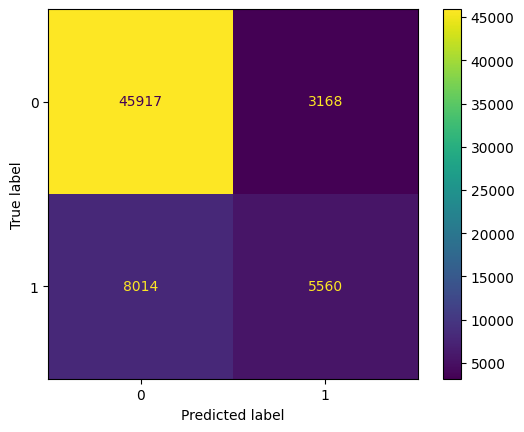

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
                              
disp.plot()
plt.show()

# Interpret final trained model using Test dataset:

Global feature importance using both Shapley values and permutation feature importance

permutation feature importance

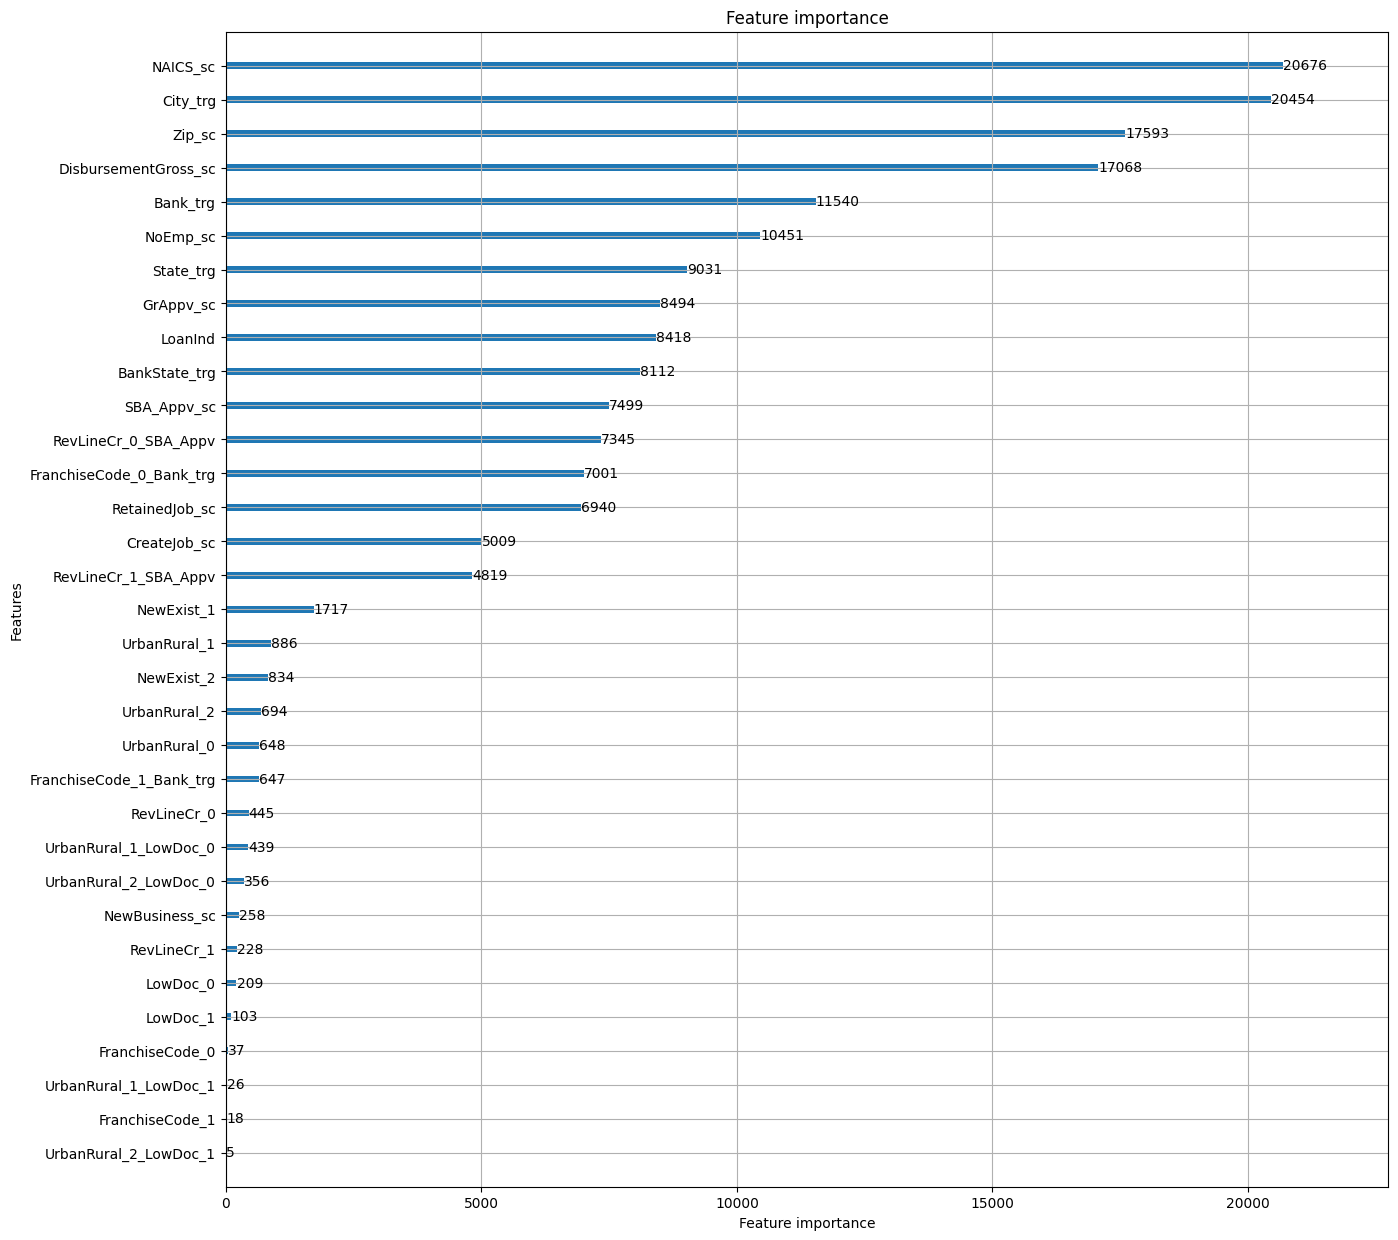

In [136]:
import lightgbm
ax = lightgbm.plot_importance(final_lgb, max_num_features=40, figsize=(15,15))
plt.show()

In [100]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [128]:
final_lgb = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=179, max_depth=7, learning_rate=0.16000000000000003, n_estimators=100,subsample_for_bin=200000,objective=None, class_weight=None,min_split_gain=0.0,min_child_weight=0.001,min_child_samples=20,subsample=1.0, subsample_freq=0, colsample_bytree=1.0,reg_alpha=0.0,reg_lambda=0.0, random_state=None, n_jobs=None,importance_type='split')
final_lgb.fit(X_train,y_train)
y_pred = final_lgb.predict(X_test)
print('=============== CLASSIFICATION REPORT ===============')
print(classification_report(y_test,y_pred))
print()
tn, fp, fn, tp = confusion_matrix(y_test,PredictionLGBM).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT ===============
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     49085
           1       0.65      0.37      0.47     13574

    accuracy                           0.82     62659
   macro avg       0.75      0.66      0.68     62659
weighted avg       0.80      0.82      0.80     62659


tn :  46349  fp :  2736  fn :  8558  tp :  5016


In [181]:
fpr, tpr, thresholds = roc_curve(y_test,final_lgb.predict_proba(X_test)[:,1])

# Calculate index for the best probability threshold
best_f1 = 0
best_f1_id = 0
for id,threshold in enumerate(thresholds):
    f1 = f1_score(final_lgb.predict_proba(X_test)[:,1] >= threshold, y_test)
    if f1 > best_f1:
        best_f1 = f1
        best_f1_id = id

print("Best f1:", best_f1)
best_threshold = thresholds[best_f1_id]
print("Threshold for best F1:", best_threshold)

Best f1: 0.5659453337822534
Threshold for best F1: 0.2666245256886339


In [182]:
thresholds

array([1.99426294e+00, 9.94262936e-01, 9.89160582e-01, ...,
       1.23963985e-04, 1.23947412e-04, 1.55379612e-05])

In [183]:
# Predict function that returns probabilities
final_lgb.predict_proba(X_test)

array([[9.99882577e-01, 1.17422575e-04],
       [5.12938459e-01, 4.87061541e-01],
       [9.21403899e-01, 7.85961005e-02],
       ...,
       [7.66603409e-01, 2.33396591e-01],
       [5.99271949e-01, 4.00728051e-01],
       [8.14245031e-01, 1.85754969e-01]])

In [184]:
# Array of actual labels
y_test

448434    0
626801    1
68614     0
599832    0
192171    0
         ..
170722    0
595349    0
100185    0
281675    1
343587    0
Name: MIS_Status, Length: 62659, dtype: int64

In [185]:
# Score first 10 records
final_lgb.predict_proba(X_test[:10])

array([[9.99882577e-01, 1.17422575e-04],
       [5.12938459e-01, 4.87061541e-01],
       [9.21403899e-01, 7.85961005e-02],
       [9.88158170e-01, 1.18418303e-02],
       [8.31781449e-01, 1.68218551e-01],
       [9.99916713e-01, 8.32868217e-05],
       [5.85668203e-01, 4.14331797e-01],
       [9.69513974e-01, 3.04860262e-02],
       [1.61712765e-01, 8.38287235e-01],
       [6.07855433e-01, 3.92144567e-01]])

In [186]:
# Get array probabilities for class 1 only (first 10 records)
final_lgb.predict_proba(X_test[:10])[:,1]

array([1.17422575e-04, 4.87061541e-01, 7.85961005e-02, 1.18418303e-02,
       1.68218551e-01, 8.32868217e-05, 4.14331797e-01, 3.04860262e-02,
       8.38287235e-01, 3.92144567e-01])

In [187]:
# Apply threshold to come up with class (Step 1)
final_lgb.predict_proba(X_test[:10])[:,1] >= best_threshold

array([False,  True, False, False, False, False,  True, False,  True,
        True])

In [188]:
# Apply threshold to predict class (Step 2)

(final_lgb.predict_proba(X_test[:10])[:,1] >= best_threshold).astype(np.int16)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int16)

In [189]:
# Get array of predicted target classes
y_pred = (final_lgb.predict_proba(X_test)[:,1] >= best_threshold).astype(np.int16)

In [190]:
#Confusion Matrix based on thre threshold that produce best F1
print(confusion_matrix(y_test,(final_lgb.predict_proba(X_test)[:,1] >= best_threshold).astype(np.int16)))

[[39233  9852]
 [ 4329  9245]]


In [192]:
# Confusion matrix based on threshold 0.5
print(confusion_matrix(y_test,final_lgb.predict_proba(X_test)[:,1] >= 0.5).astype(np.int16))

[[-19187   2736]
 [  8558   5016]]


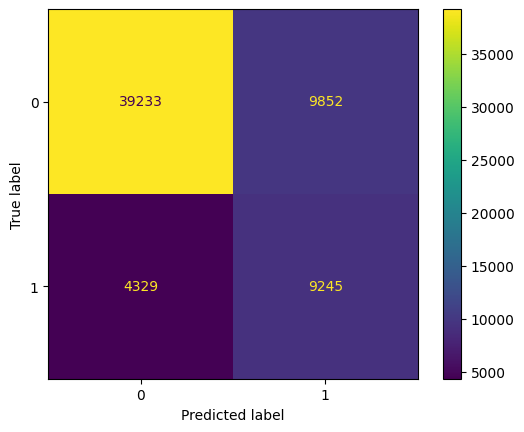

In [193]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
                              
disp.plot()
plt.show()

In [106]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [124]:
import shap

# Explain model predictions using shap library:


shap_values=shap.TreeExplainer(final_lgb).shap_values(X_test)

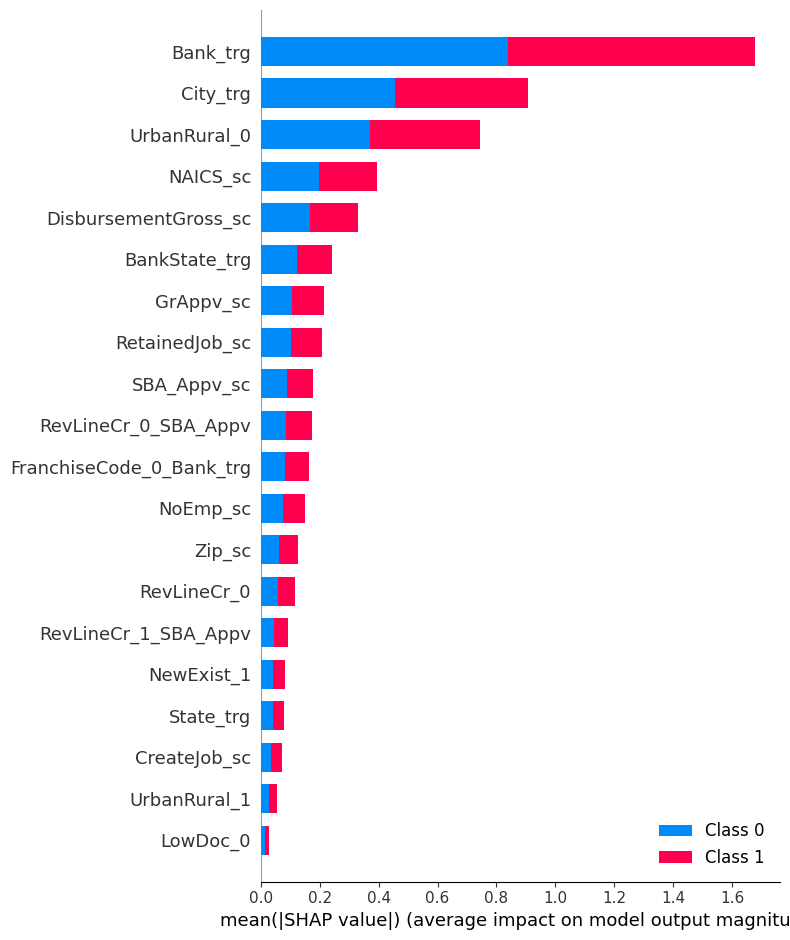

In [125]:
# Plot summary_plot
shap.summary_plot(shap_values, X_test)

Bank, City,UrbanRural are important features.

# Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:

In [ ]:
# load JS visualization code to notebook
shap.initjs()

In [129]:
obs = X_test.copy()
obs["error"] = (y_test - y_pred)

In [130]:
obs

,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,NewBusiness_sc,error
448434,3,0.307086,0.331977,0.000789,0.239581,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.0,0.000789,498000,0,-0.556667,1.224879,0.045002,0.853568,-0.302849,1.181664,-0.00208,1.313367,1.766758,-0.602974,0
626801,6,0.179916,0.262011,0.227273,0.288641,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.0,0.227273,217500,0,-1.662953,-0.458893,0.367377,-0.124458,-0.302849,0.428389,-0.00208,0.519308,0.465137,-0.602974,1
68614,5,0.040230,0.063679,0.226026,0.192464,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.226026,10050,0,0.178495,0.229382,-0.176631,-0.124458,-0.302849,-0.549058,-0.00208,-0.511061,-0.497506,1.658447,0
599832,5,0.098399,0.331977,0.033095,0.102988,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0.0,0.033095,750000,0,-0.640632,1.272077,0.508416,2.157601,-0.302849,2.094286,-0.00208,2.275401,2.936130,-0.602974,0
192171,10,0.152263,0.128446,0.254804,0.232789,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.254804,12500,0,-1.563733,1.793165,-0.156482,-0.124458,-0.175829,-0.531313,-0.00208,-0.492354,-0.486137,-0.602974,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170722,8,0.275589,0.316839,0.279855,0.294424,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.279855,0,5000,1.191115,-1.074036,-0.136334,0.005946,-0.112319,-0.567528,-0.00208,-0.549618,-0.520940,1.658447,0
595349,6,0.247408,0.123646,0.112003,0.074305,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.112003,310725,0,0.482058,-0.956110,0.508416,-0.124458,1.920009,0.878543,-0.00208,0.993835,0.897735,-0.602974,0
100185,6,0.276769,0.215131,0.149033,0.186312,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.149033,0,12500,-0.997554,0.634230,-0.156482,-0.124458,-0.175829,-0.531313,-0.00208,-0.492354,-0.486137,-0.602974,0
281675,2,0.198502,0.262011,0.322647,0.276276,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.322647,0,7500,1.283185,1.788428,-0.176631,-0.124458,-0.239339,-0.475889,-0.00208,-0.530530,-0.509339,-0.602974,1


In [131]:
obs.sort_values(by = ["error"])

,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,NewBusiness_sc,error
782190,9,0.284138,0.209994,0.186547,0.237698,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0.0,0.186547,0,7500,0.785205,-1.535528,-0.136334,0.005946,-0.112319,-0.567423,-0.00208,-0.530530,-0.509339,1.658447,-1
472772,3,0.387054,0.331977,0.279855,0.294424,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.279855,5000,0,-0.605208,1.792027,-0.116185,0.005946,-0.048808,-0.585636,-0.00208,-0.549618,-0.520940,-0.602974,-1
74546,3,0.302632,0.312719,0.186547,0.237698,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.186547,0,7500,1.057652,-1.535528,-0.156482,-0.124458,-0.175829,-0.408305,-0.00208,-0.530530,-0.509339,-0.602974,-1
760168,5,0.245739,0.199543,0.422844,0.295448,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.422844,42500,0,-0.525870,-1.008057,-0.176631,-0.059256,-0.302849,-0.440775,-0.00208,-0.396915,-0.346926,1.658447,-1
628060,4,0.383965,0.262011,0.279855,0.294424,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.279855,37500,0,1.209784,1.272661,0.145744,-0.124458,0.776825,-0.350237,-0.00208,-0.301475,-0.370128,-0.602974,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20993,5,0.164179,0.238473,0.322647,0.276276,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.322647,0,12500,-1.313498,-0.453635,-0.156482,-0.124458,-0.175829,-0.247857,-0.00208,-0.492354,-0.486137,-0.602974,1
67562,7,0.387054,0.331977,0.279855,0.294424,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.279855,0,5000,-0.603995,-1.518919,-0.136334,0.005946,0.014702,-0.567528,-0.00208,-0.549618,-0.520940,1.658447,1
591830,6,0.173021,0.234778,0.279855,0.294424,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.279855,0,12500,-0.717958,1.788428,-0.055740,0.005946,0.141722,-0.476990,-0.00208,-0.492354,-0.486137,-0.602974,1
745241,6,0.153196,0.266284,0.322647,0.276276,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.322647,15250,0,0.269194,1.792524,0.004705,1.179576,1.030866,-0.511395,-0.00208,-0.471358,-0.473376,1.658447,1


finding observations with true value of 1 , predicted value of 1 and error of 0

true_value 0, but classified as 1. So, error is -1

In [146]:
obs.loc[obs['error'] == -1].head(10)

,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,NewBusiness_sc,error
76424,9,0.355554,0.331977,0.265631,0.288641,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.265631,50000,0,-0.604505,-0.450169,-0.075888,0.266752,0.078212,-0.259699,-0.00208,-0.206035,-0.312124,-0.602974,-1
131229,3,0.214257,0.160680,0.499427,0.239581,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0.0,0.499427,21250,0,0.698975,-1.522963,-0.176631,-0.059256,-0.239339,-0.531313,-0.00208,-0.492354,-0.445534,1.658447,-1
42452,2,0.316489,0.209994,0.117806,0.125013,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0.0,0.117806,60000,0,0.744611,-0.957265,0.105447,-0.124458,-0.302849,-0.350237,-0.00208,-0.301475,-0.265720,-0.602974,-1
732683,3,0.301020,0.262011,0.690104,0.288641,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.690104,8500,0,1.270356,0.227066,-0.176631,0.136349,-0.239339,-0.585636,-0.00208,-0.549618,-0.504699,1.658447,-1
518990,5,0.311905,0.312719,0.322647,0.276276,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.322647,0,17500,1.056152,1.272661,-0.156482,-0.124458,-0.175829,-0.495098,-0.00208,-0.454179,-0.462936,-0.602974,-1
10965,5,0.198965,0.153579,0.468927,0.458388,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.468927,37500,0,-1.630624,-1.519381,-0.156482,0.005946,-0.175829,-0.350237,-0.00208,-0.301475,-0.370128,-0.602974,-1
218809,10,0.237812,0.331977,0.279855,0.294424,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.279855,5000,0,-0.623558,-1.535528,-0.075888,-0.124458,0.078212,-0.585636,-0.00208,-0.549618,-0.520940,-0.602974,-1
661829,4,0.289314,0.312719,0.468927,0.458388,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.468927,25000,0,1.050567,-1.524003,0.145744,-0.124458,0.776825,-0.440775,-0.00208,-0.396915,-0.428133,-0.602974,-1
69097,2,0.327094,0.266284,0.544014,0.186312,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.544014,50000,0,0.271300,1.786296,-0.096037,-0.059256,0.014702,-0.179124,-0.00208,-0.206035,-0.312124,-0.602974,-1
487993,4,0.338028,0.266284,0.254804,0.232789,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.254804,50000,0,0.258088,1.786238,-0.116185,0.005946,0.078212,-0.263321,-0.00208,-0.206035,-0.312124,-0.602974,-1


In [137]:

shap.force_plot(explainer.expected_value[0], shap_values[0][42452], X_test.iloc[42452,:].values,feature_names = X_test.columns)

In [147]:
shap.force_plot(explainer.expected_value[0], shap_values[0][10965], X_test.iloc[10965,:].values,feature_names = X_test.columns)

true_value 1, and classified as 1. So, error is 0 also if true_value 0, and classified as 0. So, error is 0

In [166]:
obs.loc[obs['error'] == 0].head(50)

,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,NewBusiness_sc,error
448434,3,0.307086,0.331977,7.893729e-04,0.239581,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.0,7.893729e-04,498000,0,-0.556667,1.224879,0.045002,0.853568,-0.302849,1.181664,-0.00208,1.313367,1.766758,-0.602974,0
68614,5,0.040230,0.063679,2.260264e-01,0.192464,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,2.260264e-01,10050,0,0.178495,0.229382,-0.176631,-0.124458,-0.302849,-0.549058,-0.00208,-0.511061,-0.497506,1.658447,0
599832,5,0.098399,0.331977,3.309521e-02,0.102988,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0.0,3.309521e-02,750000,0,-0.640632,1.272077,0.508416,2.157601,-0.302849,2.094286,-0.00208,2.275401,2.936130,-0.602974,0
192171,10,0.152263,0.128446,2.548044e-01,0.232789,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,2.548044e-01,12500,0,-1.563733,1.793165,-0.156482,-0.124458,-0.175829,-0.531313,-0.00208,-0.492354,-0.486137,-0.602974,0
289105,5,0.185557,0.199084,4.393384e-08,0.081624,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0.0,4.393384e-08,98000,0,-0.188511,-0.962470,0.911384,0.331954,2.745642,-0.266942,-0.00208,-0.213670,-0.089386,-0.602974,0
346930,5,0.131054,0.170906,2.798553e-01,0.294424,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,2.798553e-01,7500,0,-1.067987,1.272077,-0.116185,-0.124458,-0.048808,-0.567528,-0.00208,-0.530530,-0.509339,-0.602974,0
332555,7,0.354460,0.296389,6.901042e-01,0.288641,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,6.901042e-01,22500,0,-0.695651,1.273233,-0.136334,-0.124458,-0.112319,-0.531313,-0.00208,-0.492354,-0.439734,-0.602974,0
692281,3,0.152394,0.193575,2.548044e-01,0.232789,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,2.548044e-01,25000,0,-0.251988,0.169243,-0.136334,-0.124458,-0.112319,-0.440775,-0.00208,-0.396915,-0.428133,1.658447,0
381488,4,0.214257,0.193575,1.465912e-01,0.192464,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,1.465912e-01,0,50000,-0.288497,0.707084,0.024854,-0.124458,-0.302849,-0.259699,-0.00208,-0.206035,-0.312124,-0.602974,0
575772,3,0.299417,0.182915,2.798553e-01,0.294424,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,2.798553e-01,0,50000,1.476805,-0.461723,-0.116185,-0.059256,-0.048808,-0.241592,-0.00208,-0.206035,-0.312124,-0.602974,0


In [154]:
shap.force_plot(explainer.expected_value[0], shap_values[0][10284], X_test.iloc[10284,:].values,feature_names = X_test.columns)

In [156]:
shap.force_plot(explainer.expected_value[0], shap_values[0][55516], X_test.iloc[55516,:].values,feature_names = X_test.columns)

In [165]:
shap.force_plot(explainer.expected_value[0], shap_values[0][1951], X_test.iloc[1951,:].values,feature_names = X_test.columns)

In [167]:
shap.force_plot(explainer.expected_value[0], shap_values[0][15638], X_test.iloc[15638,:].values,feature_names = X_test.columns)

In [160]:
obs.loc[obs['error'] == 1].tail(10)

,LoanInd,City_trg,State_trg,Bank_trg,BankState_trg,NewExist_1,NewExist_2,UrbanRural_0,UrbanRural_1,UrbanRural_2,LowDoc_0,LowDoc_1,RevLineCr_0,RevLineCr_1,FranchiseCode_0,FranchiseCode_1,UrbanRural_1_LowDoc_1,UrbanRural_2_LowDoc_1,UrbanRural_1_LowDoc_0,UrbanRural_2_LowDoc_0,FranchiseCode_1_Bank_trg,FranchiseCode_0_Bank_trg,RevLineCr_0_SBA_Appv,RevLineCr_1_SBA_Appv,Zip_sc,NAICS_sc,NoEmp_sc,CreateJob_sc,RetainedJob_sc,DisbursementGross_sc,BalanceGross_sc,GrAppv_sc,SBA_Appv_sc,NewBusiness_sc,error
356090,3,0.246637,0.223289,0.215355,0.215137,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.215355,50000,0,1.020600,-0.282636,-0.055740,-0.124458,0.141722,-0.259699,-0.00208,-0.206035,-0.312124,-0.602974,1
253543,6,0.206897,0.215131,0.149033,0.073158,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.149033,0,12500,-0.986192,-0.453462,-0.116185,-0.124458,-0.048808,-0.401431,-0.00208,-0.492354,-0.486137,-0.602974,1
37753,2,0.303279,0.331977,0.279855,0.294424,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.279855,0,12500,-0.607473,0.229347,-0.176631,-0.124458,-0.239339,-0.306203,-0.00208,-0.492354,-0.486137,-0.602974,1
329032,7,0.246512,0.331977,0.067025,0.157041,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.067025,357075,0,-0.634760,0.227019,-0.136334,-0.124458,-0.112319,1.102353,-0.00208,1.229762,1.112815,-0.602974,1
12879,2,0.092555,0.138686,0.142864,0.121897,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0.0,0.142864,63750,0,0.030097,-0.350111,-0.176631,-0.059256,-0.239339,-0.350237,-0.00208,-0.301475,-0.248319,1.658447,1
781047,5,0.387054,0.331977,0.322647,0.276276,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.322647,26200,0,-0.605910,0.227066,-0.156482,-0.059256,-0.175829,-0.526967,-0.00208,-0.487773,-0.422564,-0.602974,1
62006,1,0.212485,0.331977,0.279855,0.294424,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.279855,0,50000,-0.624260,1.272672,-0.035592,-0.124458,0.205233,0.174883,-0.00208,-0.206035,-0.312124,-0.602974,1
496056,3,0.141606,0.238473,0.279855,0.294424,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0.0,0.279855,8750,0,-1.209652,-1.084885,-0.116185,-0.059256,0.014702,-0.558474,-0.00208,-0.520986,-0.503539,-0.602974,1
325602,4,0.183864,0.238473,0.254804,0.232789,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.254804,0,12500,-1.279191,1.786238,-0.176631,-0.124458,-0.239339,-0.531313,-0.00208,-0.492354,-0.486137,-0.602974,1
281675,2,0.198502,0.262011,0.322647,0.276276,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0.0,0.322647,0,7500,1.283185,1.788428,-0.176631,-0.124458,-0.239339,-0.475889,-0.00208,-0.530530,-0.509339,-0.602974,1


In [161]:
shap.force_plot(explainer.expected_value[0], shap_values[0][62006], X_test.iloc[62006,:].values,feature_names = X_test.columns)

In [162]:
shap.force_plot(explainer.expected_value[0], shap_values[0][12879], X_test.iloc[12879,:].values,feature_names = X_test.columns)

Results and conclusion discussed in h2O_gbm_notebook

# Save all artifacts

In [169]:
#Saving artifacts
#Saving the model

import pickle
filename = 'lgbm_model.sav'
pickle.dump(final_lgb, open(filename, 'wb'))

In [170]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.8197545444389474

In [341]:
#saving categorical encoder
import pickle
filename0 = 'categorical_encoders.sav'
pickle.dump(cat_encoders, open(filename0, 'wb'))
 

In [342]:
loaded_encoders = pickle.load(open(filename0, 'rb'))
loaded_encoders

{'City': [TargetEncoder(cols=['City']), 'trg'],
 'State': [TargetEncoder(cols=['State']), 'trg'],
 'Bank': [TargetEncoder(cols=['Bank']), 'trg'],
 'BankState': [TargetEncoder(cols=['BankState']), 'trg']}

In [285]:
# saving scaling variables
filename2 = 'scalers.sav'
pickle.dump(num_scalers, open(filename2, 'wb'))

In [286]:
loaded_scalers = pickle.load(open(filename2, 'rb'))
loaded_scalers

{'Zip': [StandardScaler(), 'StandardScaler'],
 'NAICS': [StandardScaler(), 'StandardScaler'],
 'NoEmp': [StandardScaler(), 'StandardScaler'],
 'CreateJob': [StandardScaler(), 'StandardScaler'],
 'RetainedJob': [StandardScaler(), 'StandardScaler'],
 'DisbursementGross': [StandardScaler(), 'StandardScaler'],
 'BalanceGross': [StandardScaler(), 'StandardScaler'],
 'GrAppv': [StandardScaler(), 'StandardScaler'],
 'SBA_Appv': [StandardScaler(), 'StandardScaler'],
 'NewBusiness': [StandardScaler(), 'StandardScaler']}